## You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, You are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

# Data Ingestion:

## Import Libraries

In [385]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')

In [386]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys

In [387]:
#pip install termcolor

In [388]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [389]:
from termcolor import colored

# 1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.



## Import Data set


In [390]:
df = pd.read_csv('Transport.csv')

## Exploratory Data Analysis (EDA)

### Head of the Dataset

In [391]:
df.head() # Top 5 data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


### Tail of the dataset

In [392]:
df.tail() # Last 5 data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


### Shape of the Dataset

In [393]:
df.shape # Cheaking Dimensions

(444, 9)

### Observations 1 :

Total No.of **Rows** = 444

Total No. of **Columns** = 9

### Summary of the Dataset

In [394]:
df.describe().T.style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
Age,444.000000,27.747748,4.416710,18.000000,25.000000,27.000000,30.000000,43.000000
Engineer,444.000000,0.754505,0.430866,0.000000,1.000000,1.000000,1.000000,1.000000
MBA,444.000000,0.252252,0.434795,0.000000,0.000000,0.000000,1.000000,1.000000
Work Exp,444.000000,6.299550,5.112098,0.000000,3.000000,5.000000,8.000000,24.000000
Salary,444.000000,16.238739,10.453851,6.500000,9.800000,13.600000,15.725000,57.000000
Distance,444.000000,11.323198,3.606149,3.200000,8.800000,11.000000,13.425000,23.400000
license,444.000000,0.234234,0.423997,0.000000,0.000000,0.000000,0.000000,1.000000


### Observations 2:

1. **Age**: Min age of Employee is 18 years where as Max age of Employee is 43 years in the ABC company.

2. **Engineer** : Yes = 1 and No = 0.

3. **MBA** : Yes = 1 and No = 0.

4. **Work Exp** : Min Working Experience of Employee is 0 years where as Max Working Experience of Employee is 24 years in the ABC company. It may contain outliers.

5. **Salary** : Min Salary of Employee is 6.5 where as Max Working Salary of Employee is 57 in the ABC company. It may contain outliers.

6. **Distance**: Min distance of employee House from the office is 3.2 where as Max distance of the employee house from the office is 23.4. It may contain outliers.

7. **License** : Yes = 1 and No = 0.

In [395]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


### Observations 3:

1. **Gender**: Frequency of Male are more compared to female in the ABC  company.

2. **Transport** : Prefered Mode of transport for the employees of the ABC company is Public Transport. 

**Note** : Transport is our target column


### Info of the Dataset

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


### Observations 4:

* Out of 9 columns total no. of float64(2), int64(5), object(2).

* Gender and Transport are our Object datatype.

* Transport is out Target Column.

### Data Cleaning 

### Step-1: Checking for duplicate records in the data.

In [397]:
duplicates = df.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


### Observations 5:

* Number of duplicate rows = 0

### Step 2: Checking Missing value.

In [398]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

### Observations 6:

* Number of Missing Values = 0

# 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Step 3 : Outlier Checks.

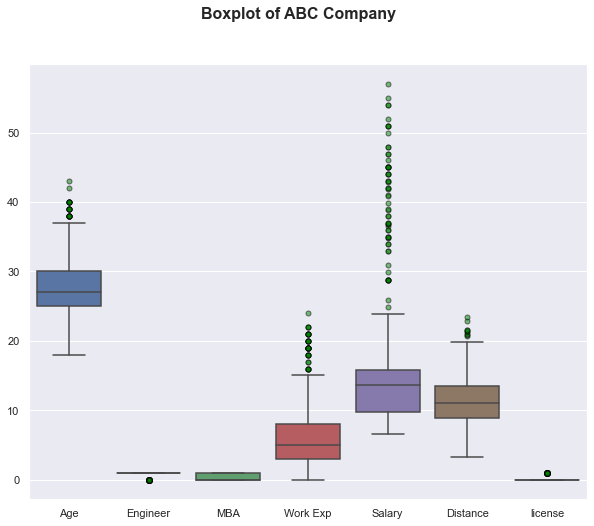

In [399]:
    plt.figure(figsize =(10,8))
    flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
    sns.boxplot(data = df, flierprops=flierprops)
    plt.suptitle('Boxplot of ABC Company',fontsize= 16, fontweight='bold')
    plt.show()

### Observation 7:

* Outliers can be easily seen for **Age,Work Exp, Salary** and **Distance**

In [400]:
df1 = df.copy() # Creating Copy of the Original List
df1.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


### Removing Outliers 

In [401]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [402]:
lr,ur=remove_outlier(df1['Age'])
print("Age :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['Age']=np.where(df1['Age']>ur,ur,df1['Age'])
df1['Age']=np.where(df1['Age']<lr,lr,df1['Age'])
print('')

lr,ur=remove_outlier(df1['Work Exp'])
print("Work Exp :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['Work Exp']=np.where(df1['Work Exp']>ur,ur,df1['Work Exp'])
df1['Work Exp']=np.where(df1['Work Exp']<lr,lr,df1['Work Exp'])
print('')

lr,ur=remove_outlier(df1['Salary'])
print("Salary :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['Salary']=np.where(df1['Salary']>ur,ur,df1['Salary'])
df1['Salary']=np.where(df1['Salary']<lr,lr,df1['Salary'])
print('')

lr,ur=remove_outlier(df1['Distance'])
print("Distance :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['Distance']=np.where(df1['Distance']>ur,ur,df1['Distance'])
df1['Distance']=np.where(df1['Distance']<lr,lr,df1['Distance'])
print('')

Age :
Lower Range : 17.5 
Upper Range : 37.5

Work Exp :
Lower Range : -4.5 
Upper Range : 15.5

Salary :
Lower Range : 0.9125000000000014 
Upper Range : 24.612499999999997

Distance :
Lower Range : 1.8625000000000007 
Upper Range : 20.3625



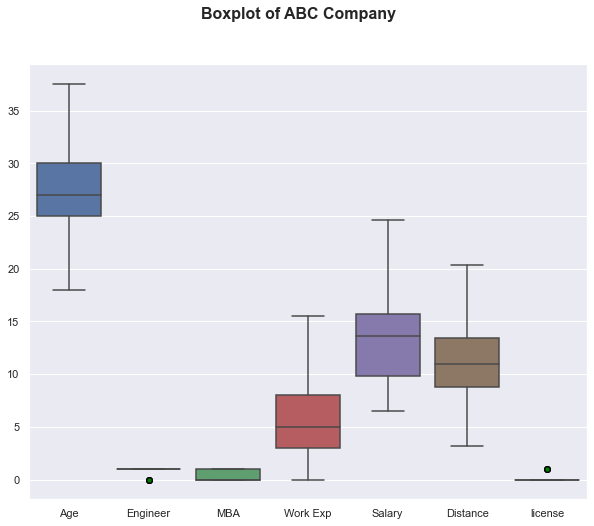

In [403]:
plt.figure(figsize =(10,8))
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
sns.boxplot(data = df1, flierprops=flierprops)
plt.suptitle('Boxplot of ABC Company',fontsize= 16, fontweight='bold')
plt.show()

As we can see the ouliers are successfuly removed

### Step 4 - Univariate analysis, Bivariate Analysis and Multivariate Analysis

### Numerical Variables:

In [404]:
num_df = df[['Age','Work Exp', 'Salary', 'Distance']]
num_df.head()

,Age,Work Exp,Salary,Distance
0,28,4,14.3,3.2
1,23,4,8.3,3.3
2,29,7,13.4,4.1
3,28,5,13.4,4.5
4,27,4,13.4,4.6


In [405]:
def univaritateananlysis(column, nbins):
    # Print descriptive statistics of the column
    print('Description of ' + column)
    print('...............................................................')
    print(num_df[column].describe(),end=' ')
    print(' ')
    
    # Plot histogram of the data
    plt.figure()
    print('Description of ' + column)
    print('...............................................................')
    sns.distplot(num_df[column],bins=nbins);
    plt.show()
    
    # Plot boxplot of the data
    plt.figure()
    print('Boxplot of ' + column)
    print('...............................................................')
    sns.boxplot(num_df[column])
    plt.show()


In [406]:
list_num_columns = list(num_df.columns.values)

Description of Age
...............................................................
count    444.000000
mean      27.747748
std        4.416710
min       18.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       43.000000
Name: Age, dtype: float64  
Description of Age
...............................................................


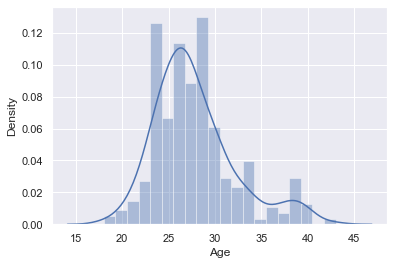

Boxplot of Age
...............................................................


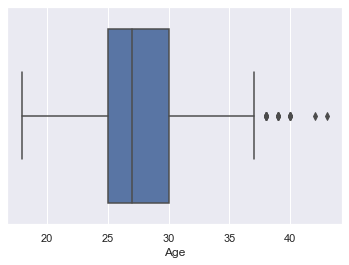

Description of Work Exp
...............................................................
count    444.000000
mean       6.299550
std        5.112098
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       24.000000
Name: Work Exp, dtype: float64  
Description of Work Exp
...............................................................


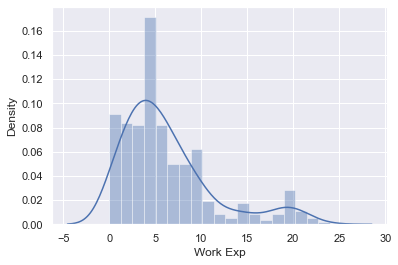

Boxplot of Work Exp
...............................................................


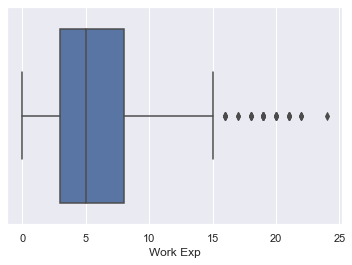

Description of Salary
...............................................................
count    444.000000
mean      16.238739
std       10.453851
min        6.500000
25%        9.800000
50%       13.600000
75%       15.725000
max       57.000000
Name: Salary, dtype: float64  
Description of Salary
...............................................................


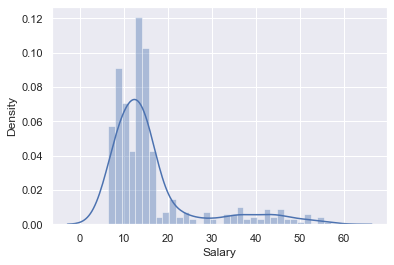

Boxplot of Salary
...............................................................


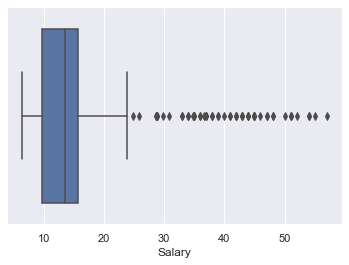

Description of Distance
...............................................................
count    444.000000
mean      11.323198
std        3.606149
min        3.200000
25%        8.800000
50%       11.000000
75%       13.425000
max       23.400000
Name: Distance, dtype: float64  
Description of Distance
...............................................................


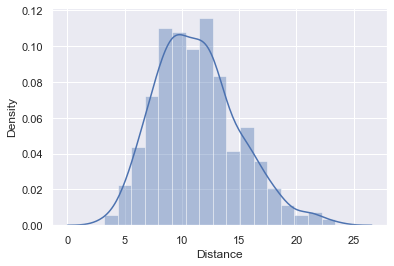

Boxplot of Distance
...............................................................


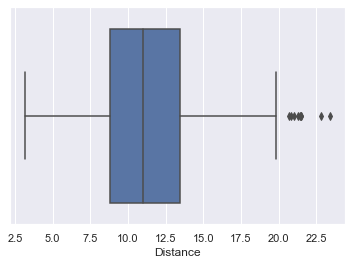

In [407]:
for x in list_num_columns:
    univaritateananlysis(x,20)

### Observations 8:



**1.Distribution of Age**

* The Distribution of Age of Employees lie between 18-43 years.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Age column.


**2.Distribution of Work Exp**

* The Distribution of Employees Work Exp in the ABC company ranges from 0-24 years.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Work Exp column towards right.


**3.Distribution of Salary**

* The Distribution of Employees Salary in the ABC company ranges from 3.2 - 23.4

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Salary column towards right.

**4.Distribution of Distance**

* The Distribution of Distance of office from home of each Employee in the ABC company ranges from 3-23.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Distance column towards right.

In [408]:
df.skew() 

Age         0.955276
Engineer   -1.186708
MBA         1.144763
Work Exp    1.352840
Salary      2.044533
Distance    0.539851
license     1.259293
dtype: float64

### Univariate  and Bivariate Ananlysis Catagorical Variables

### Gender :

<AxesSubplot:xlabel='Gender', ylabel='count'>

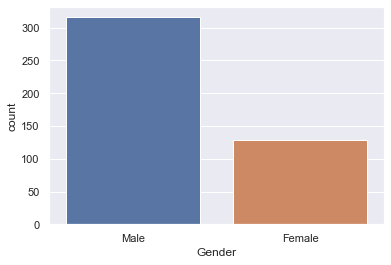

In [409]:
sns.countplot(df['Gender'])

In [410]:
df['Gender'].value_counts()

Male      316
Female    128
Name: Gender, dtype: int64

### Engineer

<AxesSubplot:xlabel='Engineer', ylabel='count'>

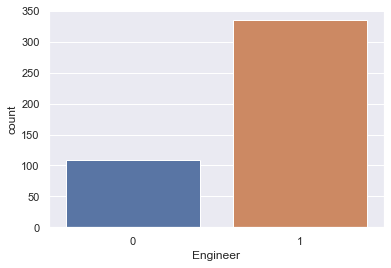

In [411]:
sns.countplot(df['Engineer'])

In [412]:
df['Engineer'].value_counts()

1    335
0    109
Name: Engineer, dtype: int64

### MBA

<AxesSubplot:xlabel='MBA', ylabel='count'>

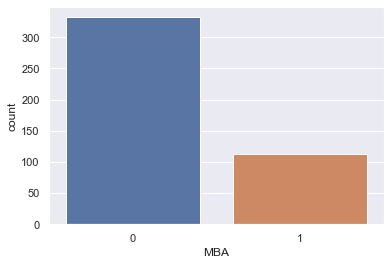

In [413]:
sns.countplot(df['MBA'])

In [414]:
df['MBA'].value_counts()

0    332
1    112
Name: MBA, dtype: int64

### license

<AxesSubplot:xlabel='license', ylabel='count'>

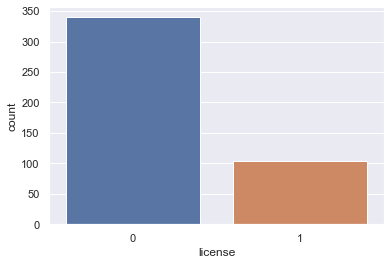

In [415]:
sns.countplot(df['license'])

In [416]:
df['license'].value_counts()

0    340
1    104
Name: license, dtype: int64

### Transport :

<AxesSubplot:xlabel='Transport', ylabel='count'>

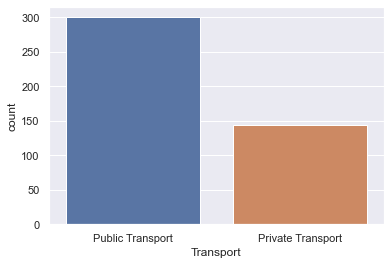

In [417]:
sns.countplot(df['Transport'])

In [418]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

### Observations 9:

**1.Distribution of Gender**

* The count of Employees in ABC Company have more Males(316) compared to Females(218).

**2.Distribution of Engineer**

* The Distribution of Employees who are Engineer in the ABC company is between 0(No) and 1(Yes).

* Total 335 employees who are Engineer 

**3.Distribution of MBA**

* The Distribution of Employees who are MBA in the ABC company is between 0(No) and 1(Yes).

* Total 112 employees who are MBA. 

**4.Distribution of license**

* The Distribution of Employees who have license in the ABC company is between 0(No) and 1(Yes).

* Total 104 employees who are license.

**5.Distribution of Transport**

* The count of Employees in ABC Company using Public Transport(300) are more  compared to Private Transport (144).

### Bi - Variate Analysis

### Gender Vs License

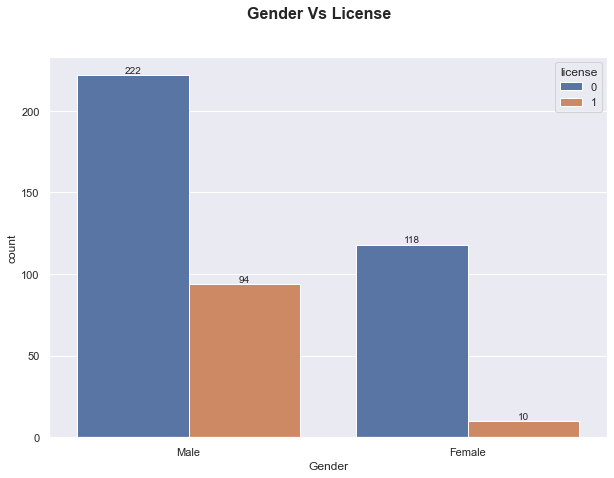

In [419]:
plt.figure(figsize = (10,7))
g_l =sns.countplot(x = 'Gender',hue = 'license' ,data = df)

for container in g_l.containers:
    g_l.bar_label(container)

plt.suptitle('Gender Vs License',fontsize= 16, fontweight='bold')
plt.show()

### Observations 10:

* The Count plot clearly states that most of the Employee in ABC Company doesn't have license.

* More no. of Male's(94) have license compared to Female's(10).


### Gender Vs Transport

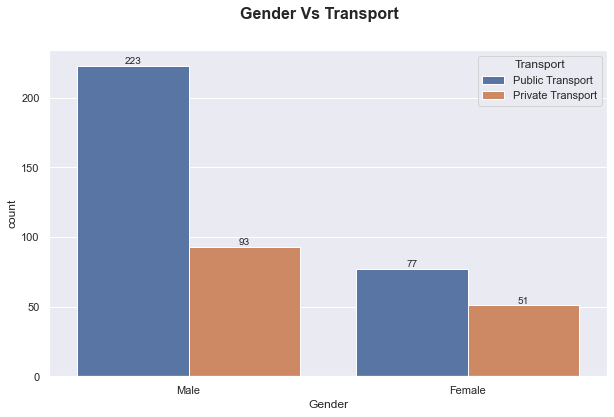

In [420]:
plt.figure(figsize = (10,6))

g_t = sns.countplot(x = 'Gender',hue = 'Transport' ,data = df)

for container in g_t.containers:
    g_t.bar_label(container)

plt.suptitle('Gender Vs Transport',fontsize= 16, fontweight='bold')
plt.show()

### Observations 11:

* Public Transport is the most preferred mode by the ABC Company Employees.

* Male(93) are more compared to Females(51) in Private Transport.

* Their is Imbalance of data between Public and Private Transport in Males (i.e 223:93).

### Transport vs license

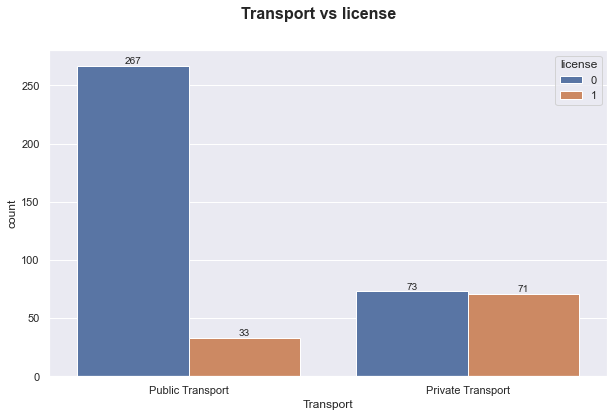

In [421]:
plt.figure(figsize = (10,6))

g_t = sns.countplot(x = 'Transport',hue = 'license' ,data = df)

for container in g_t.containers:
    g_t.bar_label(container)

plt.suptitle('Transport vs license',fontsize= 16, fontweight='bold')
plt.show()

### Observations 12:

* Almost equal balance of having and not having license in the Private Transport.

* We can clearly observe here that their are Employee's of ABC Company who prefer Private Transport even if they don't have license.

* There are some Employees who prefer to Public Transport even though they have license. We can assume that these employee live far from office. 

### Work Exp Vs Salary

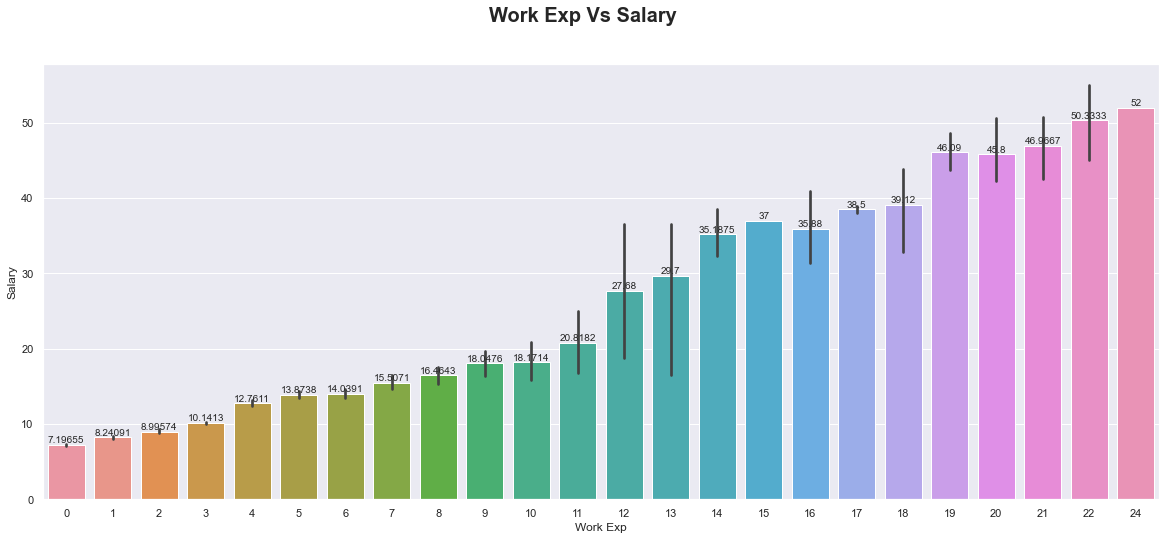

In [422]:
plt.figure(figsize = (20,8))

w_s = sns.barplot(x = 'Work Exp',y = 'Salary' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('Work Exp Vs Salary',fontsize= 20, fontweight='bold')
plt.show()

### Observations 13:

* There is a clear indication that as the no. of years of Work Experience of an Employee increases therefore his Salary also increases simultaneously.

### Age Vs Salary

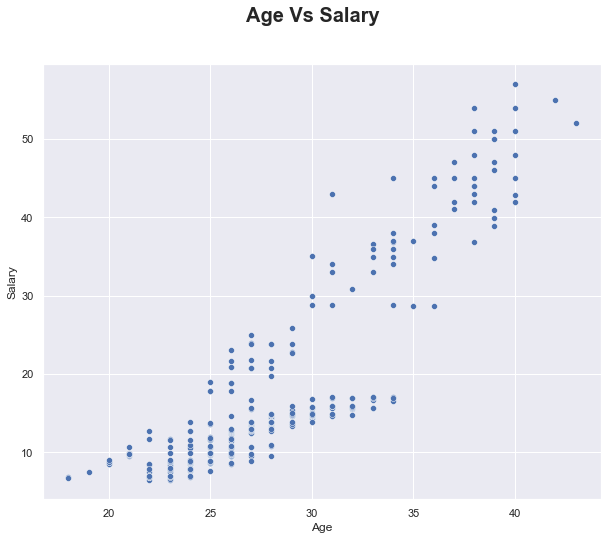

In [423]:
plt.figure(figsize = (10,8))

a_s = sns.scatterplot(data = df, x = 'Age', y= 'Salary')

for container in a_s.containers:
    a_s.bar_label(container)

plt.suptitle('Age Vs Salary',fontsize= 20, fontweight='bold')
plt.show()

### Observations 14:

* There is a clear indication that as the years of Age of an Employee increases therefore his Salary also increases simultaneously.

### Multi-Variate Analysis¶

### Gender Vs Salary Vs Transport

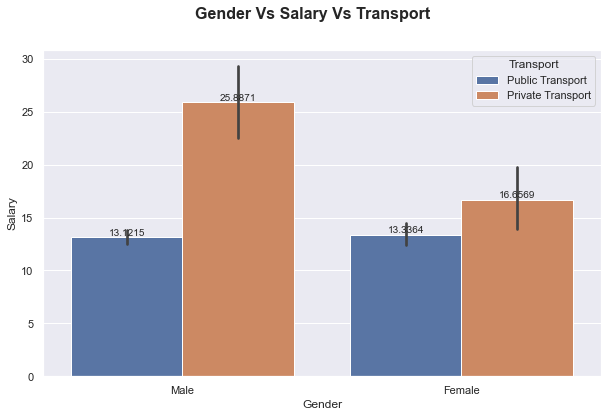

In [424]:
plt.figure(figsize = (10,6))

g_s_t = sns.barplot(x = 'Gender',y = 'Salary',hue = 'Transport' ,data = df)

for container in g_s_t.containers:
    g_s_t.bar_label(container)

plt.suptitle('Gender Vs Salary Vs Transport',fontsize= 16, fontweight='bold')
plt.show()

### Observations 15:

* The Barplot show that Employees(Male and Female) of salary upto 13 or 14 do prefer Public Transportation but as their salary increases which has increased the standard of living both Male and Female Employees prefer Private Transportation 

### Transport Vs Age Vs Gender

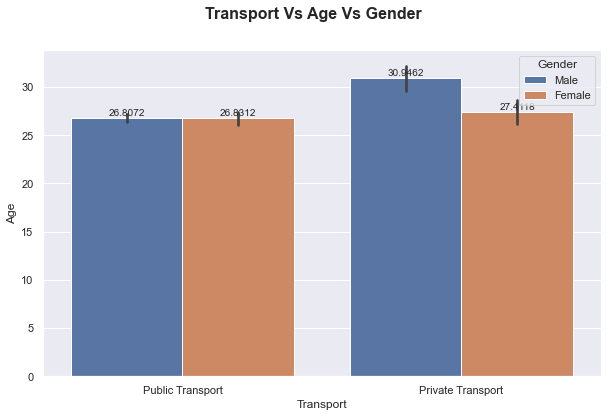

In [425]:
plt.figure(figsize = (10,6))

t_a_g = sns.barplot(x = 'Transport',y = 'Age', hue = 'Gender' ,data = df)

for container in t_a_g.containers:
    t_a_g.bar_label(container)

plt.suptitle('Transport Vs Age Vs Gender',fontsize= 16, fontweight='bold')
plt.show()

### Observations 16:

* The Barplot Indicates that both Male and Female Employee upto age of 27 are comfortable with Public and Private Transport

* The dependency of on Private Transport increases for male as their age increases. 

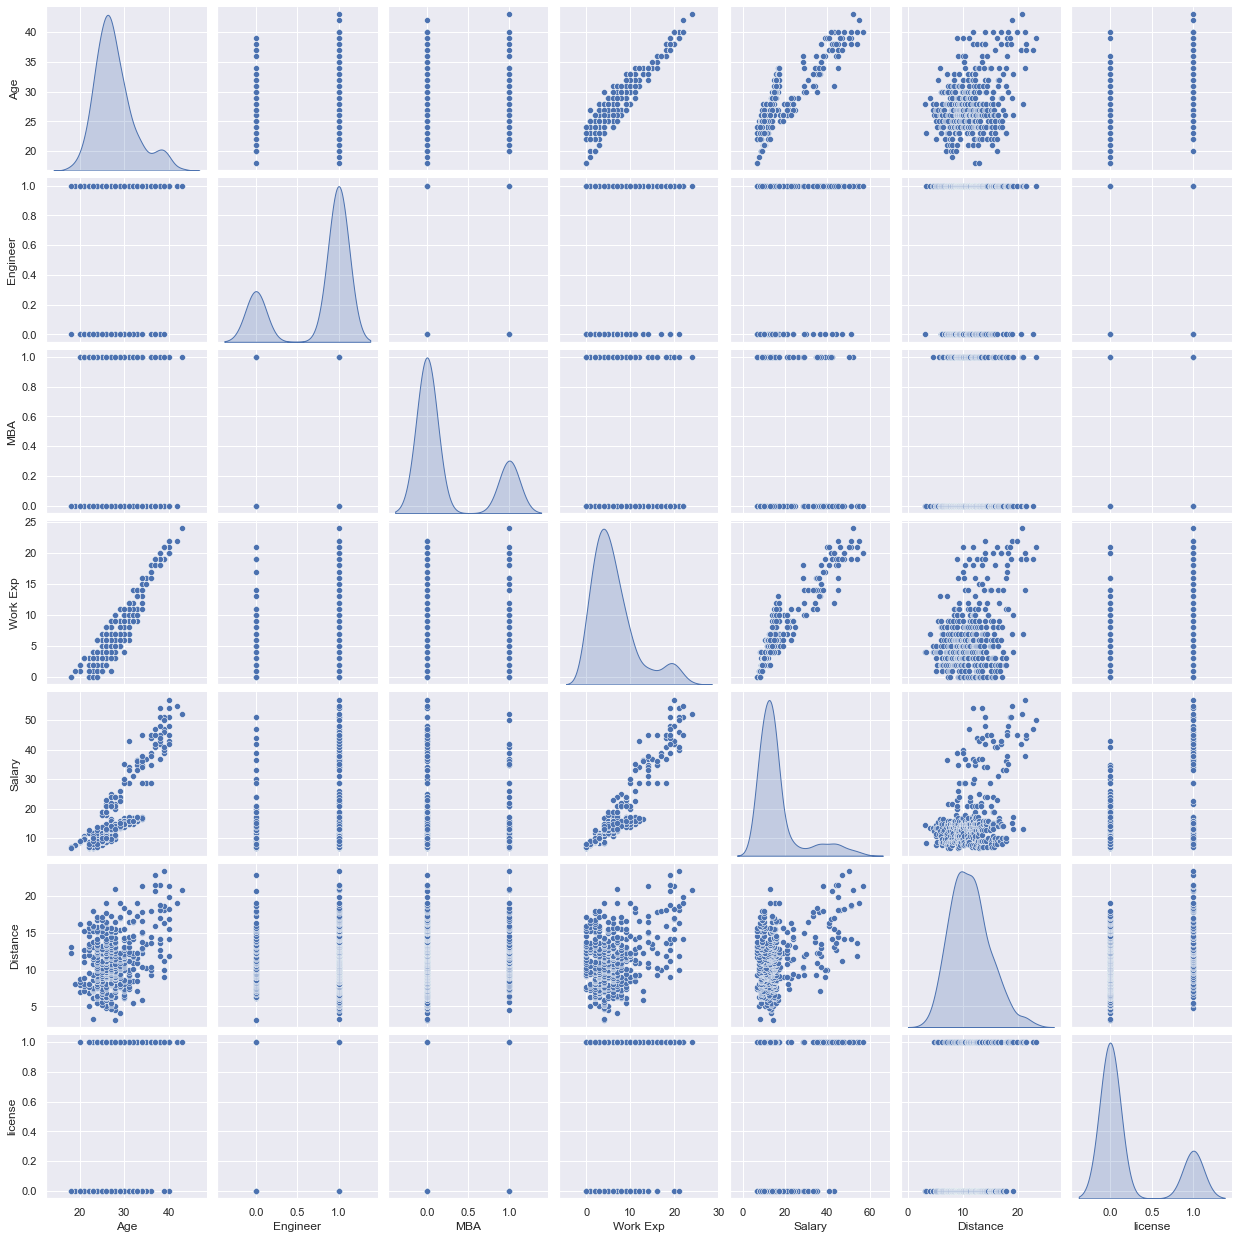

In [426]:
sns.pairplot(df, diag_kind='kde') 

plt.show()

### Observations 17:

* Age have high correlation with Work Experience, Salary and Distance.

* Work Exp have high correlation with Salary and Distance.

### Correlation Matrix

In [427]:
corr = df1.corr().T
corr

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.086817,-0.031796,0.919035,0.838396,0.328909,0.442822
Engineer,0.086817,1.000000,0.066218,0.080648,0.073001,0.060554,0.018924
MBA,-0.031796,0.066218,1.000000,0.013234,0.011035,0.035236,-0.027358
Work Exp,0.919035,0.080648,0.013234,1.000000,0.924446,0.323042,0.416786
Salary,0.838396,0.073001,0.011035,0.924446,1.000000,0.348801,0.392974
Distance,0.328909,0.060554,0.035236,0.323042,0.348801,1.000000,0.283001
license,0.442822,0.018924,-0.027358,0.416786,0.392974,0.283001,1.000000


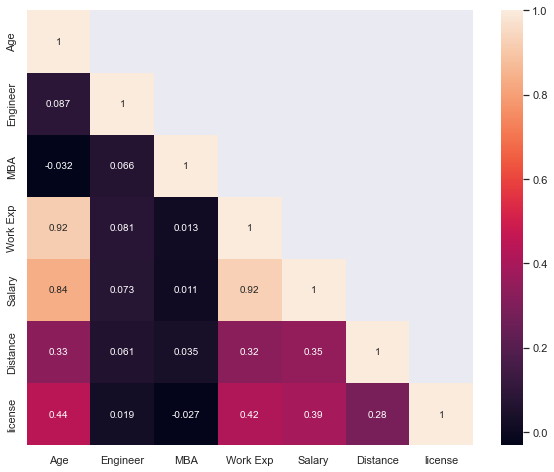

In [428]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,mask=np.triu(corr.corr(),+1));

### Observations 18:

* The Heatmap clear indicates that their is high positive correlation between Age and Salary, also Age and Work Exp.

* Their is high positive correlation between Work Exp and Salary


## Exploratory Data analysis Summary

### Observations 1 :

* Total No.of Rows = 444

* Total No. of Columns = 9

### Observations 2 :

1. **Age**: Min age of Employee is 18 years where as Max age of Employee is 43 years in the ABC company.

2. **Engineer** : Yes = 1 and No = 0.

3. **MBA** : Yes = 1 and No = 0.

4. **Work Exp** : Min Working Experience of Employee is 0 years where as Max Working Experience of Employee is 24 years in the ABC company. It may contain outliers.

5. **Salary** : Min Salary of Employee is 6.5 where as Max Working Salary of Employee is 57 in the ABC company. It may contain outliers.

6. **Distance**: Min distance of employee House from the office is 3.2 where as Max distance of the employee house from the office is 23.4. It may contain outliers.

7. **License** : Yes = 1 and No = 0.


### Observations 3 :

1. **Gender**: Frequency of Male are more compared to female in the ABC  company.

2. **Transport** : Prefered Mode of transport for the employees of the ABC company is Public Transport. 


### Observations 4 :

* Out of 9 columns total no. of float64(2), int64(5), object(2).

* Gender and Transport are our Object datatype.

* Transport is out Target Column.



### Observations 5 :

* Number of duplicate rows = 0



### Observations 6 :

* Number of Missing Values = 0

### Observation 7 :

* Outliers can be easily seen for **Age,Work Exp, Salary** and **Distance**


### Observations 8 :


**1.Distribution of Age**

* The Distribution of Age of Employees lie between 18-43 years.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Age column.


**2.Distribution of Work Exp**

* The Distribution of Employees Work Exp in the ABC company ranges from 0-24 years.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Work Exp column towards right.


**3.Distribution of Salary**

* The Distribution of Employees Salary in the ABC company ranges from 3.2 - 23.4

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Salary column towards right.

**4.Distribution of Distance**

* The Distribution of Distance of office from home of each Employee in the ABC company ranges from 3-23.

* The boxplot shows that data has outliers.

* Their is Positive skweness in the Distance column towards right.


### Observations 9 :

**1.Distribution of Gender**

* The count of Employees in ABC Company have more Males(316) compared to Females(218).

**2.Distribution of Engineer**

* The Distribution of Employees who are Engineer in the ABC company is between 0(No) and 1(Yes).

* Total 335 employees who are Engineer 

**3.Distribution of MBA**

* The Distribution of Employees who are MBA in the ABC company is between 0(No) and 1(Yes).

* Total 112 employees who are MBA. 

**4.Distribution of license**

* The Distribution of Employees who have license in the ABC company is between 0(No) and 1(Yes).

* Total 104 employees who are license.

**5.Distribution of Transport**

* The count of Employees in ABC Company using Public Transport(300) are more  compared to Private Transport (144).


### Observations 10 :

* The Count plot clearly states that most of the Employee in ABC Company doesn't have license.

* More no. of Male's(94) have license compared to Female's(10).

### Observations 11 :

* Public Transport is the most preferred mode by the ABC Company Employees.

* Male(93) are more compared to Females(51) in Private Transport.

* Their is Imbalance of data between Public and Private Transport in Males (i.e 223:93).


### Observations 12 :

* Almost equal balance of having and not having license in the Private Transport.

* We can clearly observe here that their are Employee's of ABC Company who prefer Private Transport even if they don't have license.

* There are some Employees who prefer to Public Transport even though they have license. We can assume that these employee live far from office. 


### Observations 13 :

* There is a clear indication that as the no. of years of Work Experience of an Employee increases therefore his Salary also increases simultaneously.

### Observations 14 :

* There is a clear indication that as the years of Age of an Employee increases therefore his Salary also increases simultaneously.

### Observations 15 :

* The Barplot show that Employees(Male and Female) of salary upto 13 or 14 do prefer Public Transportation but as their salary increases which has increased the standard of living both Male and Female Employees prefer Private Transportation 

### Observations 16 :

* The Barplot Indicates that both Male and Female Employee upto age of 27 are comfortable with Public and Private Transport

* The dependency of on Private Transport increases for male as their age increases.


### Observations 17 :

* Age have high correlation with Work Experience, Salary and Distance.

* Work Exp have high correlation with Salary and Distance.

### Observations 18 :

* The Heatmap clear indicates that their is high positive correlation between Age and Salary, also Age and Work Exp.

* Their is high positive correlation between Work Exp and Salary


# Data Preparation:

# 3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 


In [429]:
df1.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,Male,0,0,4.0,14.3,3.2,0,Public Transport
1,23.0,Female,1,0,4.0,8.3,3.3,0,Public Transport
2,29.0,Male,1,0,7.0,13.4,4.1,0,Public Transport
3,28.0,Female,1,1,5.0,13.4,4.5,0,Public Transport
4,27.0,Male,1,0,4.0,13.4,4.6,0,Public Transport


In [430]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

## Encoding the data (having string values)

In [431]:
df1['Gender'].replace({'Male':1,'Female':0},inplace = True)

In [432]:
df1['Transport'].replace({'Public Transport':1,'Private Transport':0},inplace = True)

In [433]:
df1.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,0,0,4.0,14.3,3.2,0,1
1,23.0,0,1,0,4.0,8.3,3.3,0,1
2,29.0,1,1,0,7.0,13.4,4.1,0,1
3,28.0,0,1,1,5.0,13.4,4.5,0,1
4,27.0,1,1,0,4.0,13.4,4.6,0,1


## Is Scaling necessary here or not?

Yes, Sacling of data is necessary for K-NN. KNN which uses Euclidean distance is one such algorithm which essentially require scaling. In KNN if one of the feature has a broad range of values, the distance is governed by this (i.e **Salary**) particular feature.


As we can see from the **Salary, Age and Distance** are in different values and this may get more weightage.

Scaling will help keep the values in relatively same range.

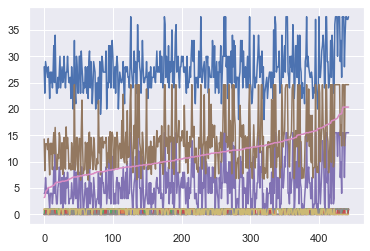

In [434]:
# Graphical Data before Scaling

plt.plot(df1)
plt.show()

In [435]:
# Scaling of data

from sklearn.preprocessing import StandardScaler

In [436]:
scaling = StandardScaler().fit_transform(df1)

In [437]:
df_scaled = pd.DataFrame(scaling,columns=df1.columns)
df_scaled.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,0.083578,0.636446,-1.753110,-0.580818,-0.459062,0.030061,-2.292795,-0.553066,0.69282
1,-1.117345,-1.571226,0.570415,-0.580818,-0.459062,-1.098453,-2.264482,-0.553066,0.69282
2,0.323762,0.636446,0.570415,-0.580818,0.235791,-0.139216,-2.037981,-0.553066,0.69282
3,0.083578,-1.571226,0.570415,1.721710,-0.227444,-0.139216,-1.924730,-0.553066,0.69282
4,-0.156607,0.636446,0.570415,-0.580818,-0.459062,-0.139216,-1.896417,-0.553066,0.69282


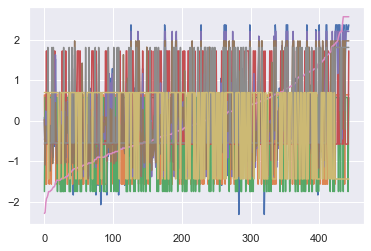

In [438]:
# Graphical Data after Scaling

plt.plot(df_scaled)
plt.show()

## Split the data into train and test (70:30)

In [439]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [440]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [441]:
X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28.0,1,0,0,4.0,14.3,3.2,0
1,23.0,0,1,0,4.0,8.3,3.3,0
2,29.0,1,1,0,7.0,13.4,4.1,0
3,28.0,0,1,1,5.0,13.4,4.5,0
4,27.0,1,1,0,4.0,13.4,4.6,0


# Modelling:

# 4. Apply Logistic Regression. Interpret the inferences


In [442]:
import statsmodels.formula.api as SM

In [443]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = 'y~x',data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ",vif)

In [444]:
vif_cal(input_data=df1[['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license']])

Age VIF =  6.8
Gender VIF =  1.08
Engineer VIF =  1.01
MBA VIF =  1.03
Work Exp VIF =  13.38
Salary VIF =  7.09
Distance VIF =  1.18
license VIF =  1.35



**We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.**

### Model 1

In [445]:
df1.rename(columns = {'Work Exp':'Work_Exp'}, inplace = True)

In [446]:
df1.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [447]:
import statsmodels.formula.api as sm

In [448]:
f_1 = 'Transport~Age+Gender+Engineer+MBA+Work_Exp+Salary+Distance+license'

In [449]:
model_1 = sm.logit(formula =f_1, data =df1).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.448655
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.2879
Time:                        11:59:53   Log-Likelihood:                -199.20
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.366e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6952      1.812     -0.384      0.701      -4.247       2.857
Age            0.1889      0.077      2.467      0.014       0.039       0.339
Gender         1.3077      0.289      4.522      0.000       0.741       1.874
Engineer      -0.1756      0.295     -0.595      0.552      -0.754       0.403
MBA            0.5551      0.311      1.785      0.074      -0.054       1.165
Work_Exp      -0.2646      0.105     -2.525      0.012      -0.470      -0.059
Salary         0.0325      0.058      0.557      0.577      -0.082       0.147
Distance      -0.2515      0.042     -6.051      0.000      -0.333      -0.170
license       -2.2425      0.329     -6.816      0.000      -2.887      -1.598
==============================================================================
"""

#### Observation Logistic Regression Model 1:

* We can clearly see that Salary has highest p-value (0.557) thus it is greater than 0.05

* Salary has VIF =  7.09 which means it has Multi-collinearity

* Hence it confirms that Salary attribute is not significant


In [450]:
print('The adjusted pseudo R-square value is', 1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.2593510805530256


### Model 2 (Droping 'Salary ')

In [451]:
f_2 = 'Transport~Age+Gender+Engineer+MBA+Work_Exp+Distance+license'

In [452]:
model_2 = sm.logit(formula =f_2, data =df1).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.449004
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            7
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.2874
Time:                        11:59:53   Log-Likelihood:                -199.36
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 2.176e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3504      1.704     -0.206      0.837      -3.689       2.989
Age            0.1828      0.076      2.415      0.016       0.034       0.331
Gender         1.2964      0.288      4.497      0.000       0.731       1.861
Engineer      -0.1770      0.295     -0.600      0.549      -0.755       0.401
MBA            0.5509      0.311      1.773      0.076      -0.058       1.160
Work_Exp      -0.2223      0.072     -3.079      0.002      -0.364      -0.081
Distance      -0.2482      0.041     -6.039      0.000      -0.329      -0.168
license       -2.2315      0.328     -6.813      0.000      -2.873      -1.589
==============================================================================
"""

In [453]:
vif_cal(input_data=df1[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Distance','license']])

Age VIF =  6.75
Gender VIF =  1.07
Engineer VIF =  1.01
MBA VIF =  1.03
Work_Exp VIF =  6.55
Distance VIF =  1.16
license VIF =  1.35


In [454]:
print('The adjusted pseudo R-square value is', 1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.262370680495439


#### Observation Logistic Regression Model 2:

* We can clearly see that Engineer has highest p-value (0.549) thus it is greater than 0.05

* Hence it confirms that Engineer attribute is not significant


### Model 3 (Droping 'Engineer ')

In [455]:
f_3 = 'Transport~Age+Gender+MBA+Work_Exp+Distance+license'

In [456]:
model_3 = sm.logit(formula =f_3, data =df1).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.449413
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.2867
Time:                        11:59:53   Log-Likelihood:                -199.54
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 4.784e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4107      1.700     -0.242      0.809      -3.743       2.922
Age            0.1801      0.075      2.387      0.017       0.032       0.328
Gender         1.2898      0.288      4.485      0.000       0.726       1.854
MBA            0.5328      0.309      1.727      0.084      -0.072       1.138
Work_Exp      -0.2213      0.072     -3.068      0.002      -0.363      -0.080
Distance      -0.2483      0.041     -6.038      0.000      -0.329      -0.168
license       -2.2205      0.327     -6.798      0.000      -2.861      -1.580
==============================================================================
"""

In [457]:
vif_cal(input_data=df1[['Age', 'Gender', 'MBA', 'Work_Exp', 'Distance','license']])

Age VIF =  6.74
Gender VIF =  1.07
MBA VIF =  1.03
Work_Exp VIF =  6.55
Distance VIF =  1.16
license VIF =  1.34


#### Observation Logistic Regression Model 3:

* We can clearly see that MBA has highest p-value (0.084) thus it is greater than 0.05

* Hence it confirms that MBA attribute is not significant


In [458]:
print('The adjusted pseudo R-square value is', 1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.26529616067759454


### Model 4 (Droping 'MBA ')

In [459]:
f_4 = 'Transport~Age+Gender+Work_Exp+Distance+license'

In [460]:
model_4 = sm.logit(formula =f_4, data =df1).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.452894
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.2812
Time:                        11:59:53   Log-Likelihood:                -201.08
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 3.639e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0056      1.684     -0.003      0.997      -3.306       3.294
Age            0.1645      0.075      2.201      0.028       0.018       0.311
Gender         1.3489      0.286      4.724      0.000       0.789       1.909
Work_Exp      -0.2051      0.071     -2.882      0.004      -0.345      -0.066
Distance      -0.2467      0.041     -5.986      0.000      -0.328      -0.166
license       -2.2382      0.327     -6.855      0.000      -2.878      -1.598
==============================================================================
"""

In [461]:
vif_cal(input_data=df1[['Age', 'Gender', 'Work_Exp', 'Distance','license']])

Age VIF =  6.65
Gender VIF =  1.06
Work_Exp VIF =  6.47
Distance VIF =  1.15
license VIF =  1.34


In [462]:
print('The adjusted pseudo R-square value is', 1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.26334633603351165


#### Observation Logistic Regression Model 4:

* Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable Transport.

* Also we can see that coef value is highest for license followed by Gender, Distance, Work_Exp and Age.

* 'p values' indicate that all the variable are significant at 95% confidence level

In [463]:
model_4.params

Intercept   -0.005595
Age          0.164455
Gender       1.348884
Work_Exp    -0.205084
Distance    -0.246745
license     -2.238245
dtype: float64

In [464]:
for i,j in np.array(model_4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.01) * Intercept + (0.16) * Age + (1.35) * Gender + (-0.21) * Work_Exp + (-0.25) * Distance + (-2.24) * license + 

### Observation :

Logistic regression equation is as shown below :-

Log(odd) = (-0.01)+ (0.16)Age + (1.35)Gender + (-0.21)Work_Exp + (-0.25)Distance + (-2.24)license 

Most important attribute here is license followed by Distance,Gender, Work_Exp and Age.

### Prediction on Data

Now, let us see the predicted probability values.

There are probabilities of an individual going to Transport.

In [465]:
y_prob_pred_4 = model_4.predict()
y_prob_pred_4

array([0.98710725, 0.89494516, 0.97504106, 0.92153427, 0.97871454,
       0.79837467, 0.97501592, 0.91656677, 0.97062565, 0.97540163,
       0.88104622, 0.80490687, 0.97201281, 0.79704076, 0.96779826,
       0.96276503, 0.94336792, 0.88017716, 0.96122548, 0.96122548,
       0.95641839, 0.92787969, 0.74721181, 0.9581587 , 0.96611225,
       0.89332552, 0.95063808, 0.97575712, 0.80474468, 0.84978257,
       0.89095124, 0.9644589 , 0.94096773, 0.86177458, 0.84337375,
       0.95022726, 0.76007013, 0.862634  , 0.96531028, 0.93512305,
       0.68497833, 0.82609987, 0.92379128, 0.95637533, 0.5284908 ,
       0.76935093, 0.91906476, 0.94706911, 0.85780375, 0.85756684,
       0.93900008, 0.81918366, 0.95435404, 0.96526046, 0.94237286,
       0.72154899, 0.95133359, 0.87555139, 0.96152781, 0.93209284,
       0.65219439, 0.9501784 , 0.95564185, 0.84853333, 0.85032559,
       0.72582915, 0.93821879, 0.95278977, 0.952877  , 0.94899727,
       0.90734673, 0.96027324, 0.8066024 , 0.95135461, 0.72726

Let us see the spread of the probability of the Transport.

Text(0, 0.5, 'Transport Predicted')

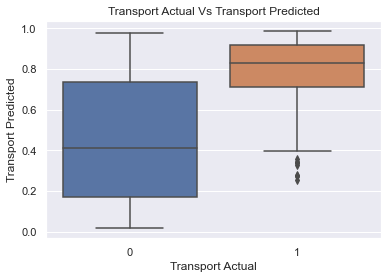

In [466]:
sns.boxplot(x=df1['Transport'],y=y_prob_pred_4)
plt.xlabel('Transport');
plt.title('Transport Actual Vs Transport Predicted')
plt.xlabel('Transport Actual')
plt.ylabel('Transport Predicted')

**Observation :**

From the above boxplot, we need to decide on one such value of a cut-off which gives most resonable power of the model  

### Choosing a different cut-off method for the predictions on the Probability Predictions Data

In [467]:
from sklearn import metrics

0.1 

Accuracy Score 0.7342
F1 Score 0.8357 

Confusion Matrix


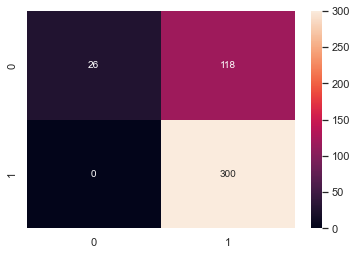

True Negative: 26 
False Positives: 118 
False Negatives: 0 
True Positives: 300 


0.2 

Accuracy Score 0.768
F1 Score 0.8535 

Confusion Matrix


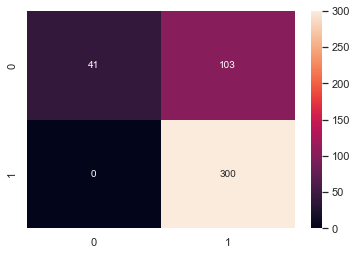

True Negative: 41 
False Positives: 103 
False Negatives: 0 
True Positives: 300 


0.3 

Accuracy Score 0.7928
F1 Score 0.8655 

Confusion Matrix


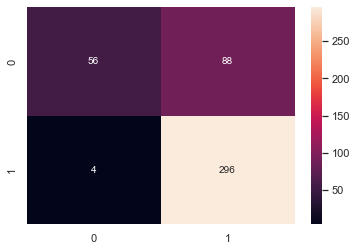

True Negative: 56 
False Positives: 88 
False Negatives: 4 
True Positives: 296 


0.4 

Accuracy Score 0.8063
F1 Score 0.8709 

Confusion Matrix


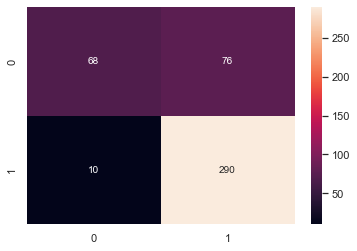

True Negative: 68 
False Positives: 76 
False Negatives: 10 
True Positives: 290 


0.5 

Accuracy Score 0.8063
F1 Score 0.8652 

Confusion Matrix


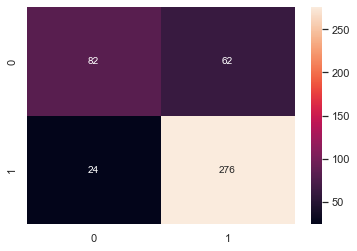

True Negative: 82 
False Positives: 62 
False Negatives: 24 
True Positives: 276 


0.6 

Accuracy Score 0.7995
F1 Score 0.8529 

Confusion Matrix


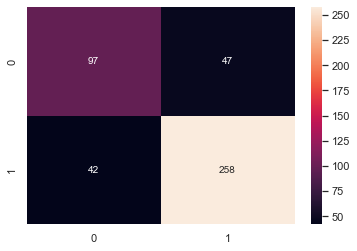

True Negative: 97 
False Positives: 47 
False Negatives: 42 
True Positives: 258 


0.7 

Accuracy Score 0.741
F1 Score 0.7972 

Confusion Matrix


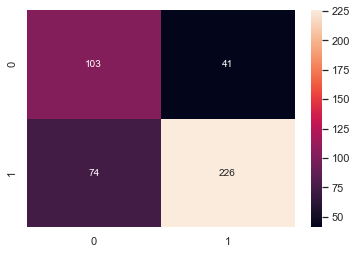

True Negative: 103 
False Positives: 41 
False Negatives: 74 
True Positives: 226 


0.8 

Accuracy Score 0.6644
F1 Score 0.7038 

Confusion Matrix


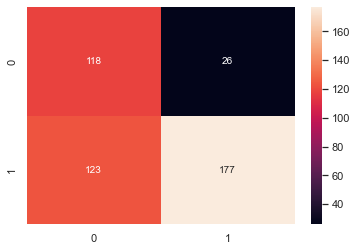

True Negative: 118 
False Positives: 26 
False Negatives: 123 
True Positives: 177 


0.9 

Accuracy Score 0.5158
F1 Score 0.4743 

Confusion Matrix


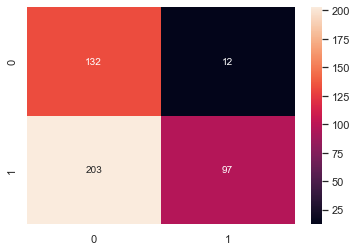

True Negative: 132 
False Positives: 12 
False Negatives: 203 
True Positives: 97 




In [468]:
for j in np.arange(0.1,1,0.1):
    Transport_prob = j #defining the cut-off value of our choice
    Transport_cutoff_data=[]#defining an empty list
    for i in range(0,len(df1['Transport'])):#defining a loop for the length of the test data
        if np.array(y_prob_pred_4[:])[i] >= Transport_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        Transport_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(df1['Transport'],Transport_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(df1['Transport'],Transport_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(df1['Transport'],Transport_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();
    tn, fp, fn, tp = metrics.confusion_matrix(df1['Transport'],Transport_cutoff_data).ravel()
    print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

### Let us take a cut-off at 0.5 and check power of the model

In [469]:
y_class_pred=(y_prob_pred_4>=0.5).astype(int)

### Model Evaluation on Data at cut-off 0.5 using Confusion Matrix heatmap and AUC-ROC curve

0.5 

Accuracy Score 0.8063
F1 Score 0.8652 

True Negative: 82 
False Positives: 62 
False Negatives: 24 
True Positives: 276 

Confusion Matrix :



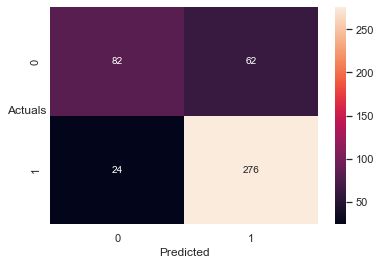

<Figure size 432x288 with 0 Axes>

In [470]:
sns.heatmap((metrics.confusion_matrix(df1['Transport'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print("0.5",'\n')
print('Accuracy Score',round(metrics.accuracy_score(df1['Transport'],y_class_pred),4))
print('F1 Score',round(metrics.f1_score(df1['Transport'],y_class_pred),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(df1['Transport'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix :''\n')

### Classification report at cut-off 0.05

In [471]:
print(metrics.classification_report(df1['Transport'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.774     0.569     0.656       144
           1      0.817     0.920     0.865       300

    accuracy                          0.806       444
   macro avg      0.795     0.745     0.761       444
weighted avg      0.803     0.806     0.797       444



**Observation :**

With accuracy of 80.6% and recall rate of 92%, model is able to predict 92% of Public Transport which were actually claimed as claimed.

Precision is 81.7% of data which means, out of total employees predicted by model as opt for Public Transport , 81.7% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 92% plus Precisin rate is also 81.7% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

### Calculate the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve

AUC: 0.820


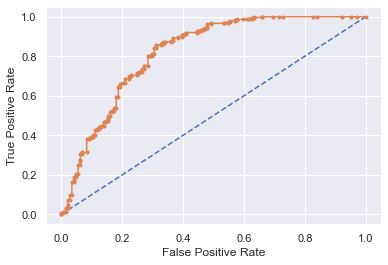

In [472]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(df1['Transport'],y_prob_pred_4)
print('AUC: %.3f' % auc)

# # calculate roc curve
# from sklearn.metrics import roc_curve

fpr, tpr, thresholds = metrics.roc_curve(df1['Transport'],y_prob_pred_4)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')

# show the plot

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Only for Predictive purposes of Logistic Regression

If we only wanted to predict using Logistic Regression and was not looking for the model building aspect of it, we can do that as well. For this, we will use the same variables as of Model 2,Model 3 and Model 4.

First we will split the data into train and test. We will build the model on the training data and check the the model performance metrics on the test data. 

We will take the default cut-off of 0.5 to get the class predictions.

### Splitting the data into train and test.

In [473]:
Train,Test = train_test_split(df1,test_size=0.3,random_state=1,stratify=df1['Transport'])

Checking the proportion of 1s and 0s in the target variable in both Training and Test data

In [474]:
print(Train['Transport'].value_counts(1),'\n')
print(Test['Transport'].value_counts(1))

1    0.674194
0    0.325806
Name: Transport, dtype: float64 

1    0.679104
0    0.320896
Name: Transport, dtype: float64


In [475]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none',solver='newton-cg')

### Using only the Model 2 (Droping 'Salary ') variables to build the model on the training data and predict on the training as well as test data.

In [476]:
Train.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [477]:
model_sklearn_2 = lr.fit(Train[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Distance','license']],Train['Transport'])

In [478]:
# Predicting on the Training Data

model_sklearn_2_pred_train = model_sklearn_2.predict(Train[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Distance','license']])

In [479]:
# Predicting on the Test Data

model_sklearn_2_pred_test = model_sklearn_2.predict(Test[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Distance','license']])

### Using only the Model 3 (Droping 'Engineer ') variables to build the model on the training data and predict on the training as well as test data.

In [480]:
model_sklearn_3 = lr.fit(Train[['Age', 'Gender','MBA', 'Work_Exp', 'Distance','license']],Train['Transport'])

In [481]:
# Predicting on the Training Data

model_sklearn_3_pred_train = model_sklearn_3.predict(Train[['Age', 'Gender', 'MBA', 'Work_Exp', 'Distance','license']])

In [482]:
# Predicting on the Test Data

model_sklearn_3_pred_test = model_sklearn_3.predict(Test[['Age', 'Gender', 'MBA', 'Work_Exp', 'Distance','license']])

### Using only the Model 4 (Droping 'MBA ') variables to build the model on the training data and predict on the training as well as test data.

In [483]:
model_sklearn_4 = lr.fit(Train[['Age', 'Gender','Work_Exp', 'Distance','license']],Train['Transport'])

In [484]:
# Predicting on the Training Data

model_sklearn_4_pred_train = model_sklearn_4.predict(Train[['Age', 'Gender', 'Work_Exp', 'Distance','license']])

In [485]:
# Predicting on the Test Data

model_sklearn_4_pred_test = model_sklearn_4.predict(Test[['Age', 'Gender', 'Work_Exp', 'Distance','license']])

## Confusion Matrix check for all the models built

### Confusion Matrix Model 2

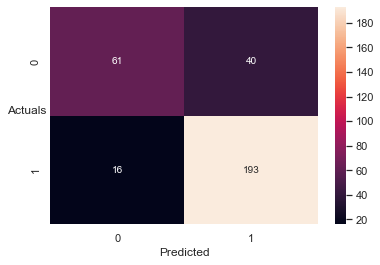

In [486]:
sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_2_pred_train)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

### Confusion Matrix Model 3

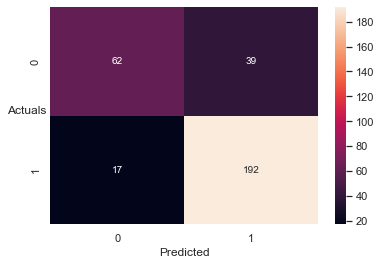

In [487]:
sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_3_pred_train)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

### Confusion Matrix Model 4

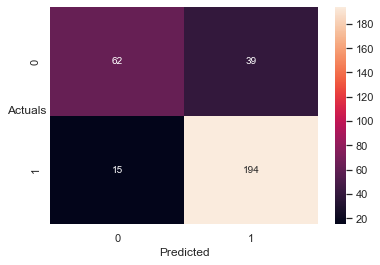

In [488]:
sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_4_pred_train)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [489]:
print('Accuracy Score - Model 2')
print('Training:', metrics.accuracy_score(Train['Transport'],model_sklearn_2_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Transport'],model_sklearn_2_pred_test))

print('\nAccuracy Score - Model 3')
print('Training:', metrics.accuracy_score(Train['Transport'],model_sklearn_3_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Transport'],model_sklearn_3_pred_test))

print('\nAccuracy Score - Model 4')
print('Training:', metrics.accuracy_score(Train['Transport'],model_sklearn_4_pred_train))
print('Testing: ', metrics.accuracy_score(Test['Transport'],model_sklearn_4_pred_test))


Accuracy Score - Model 2
Training: 0.8193548387096774
Testing:  0.8059701492537313

Accuracy Score - Model 3
Training: 0.8193548387096774
Testing:  0.8134328358208955

Accuracy Score - Model 4
Training: 0.8258064516129032
Testing:  0.8208955223880597


### Observation:

* Their is an improvement in the Accuracy Scores from Model 2 to Model 4 

* Model 4 has the best Accuracy score in training and testing

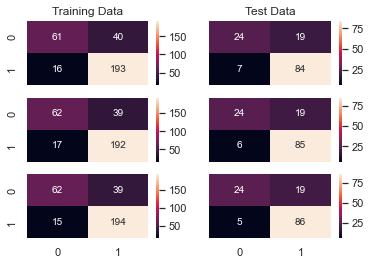

In [490]:

f,a =  plt.subplots(3,2,sharex=True,sharey=True)

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_2_pred_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_10 = sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_3_pred_train)),annot=True,fmt='.5g',ax=a[1][0]);

plot_20 = sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_4_pred_train)),annot=True,fmt='.5g',ax=a[2][0]);

#Plotting confusion matrix for the different models for the Test Data


plot_01 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_sklearn_2_pred_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data')
plot_11 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_sklearn_3_pred_test)),annot=True,fmt='.5g',ax=a[1][1]);
plot_21 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_sklearn_4_pred_test)),annot=True,fmt='.5g',ax=a[2][1]);

### AUC and ROC for the Training and Testing data Model 2

AUC for Train dataset: 0.764
AUC for test dataset: 0.741


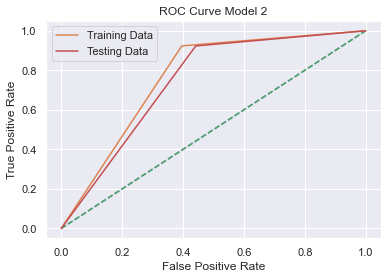

In [491]:

# calculate AUC
train_auc = metrics.roc_auc_score(Train['Transport'],model_sklearn_2_pred_train)
print('AUC for Train dataset: %.3f' % train_auc)

# # calculate roc curve

from sklearn.metrics import roc_curve
train_fpr, train_tpr, train_thresholds = roc_curve(Train['Transport'],model_sklearn_2_pred_train)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data')


# calculate AUC
test_auc = metrics.roc_auc_score(Test['Transport'],model_sklearn_2_pred_test)
print('AUC for test dataset: %.3f' % test_auc)

# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(Test['Transport'],model_sklearn_2_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve Model 2')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


### Observation AUC for Model 2:

AUC for Train dataset: 0.764


AUC for test dataset: 0.741

### Classification_report Model 2

In [492]:
# Train 

print('Train Classification_report Model 2')
print('\n')
print(metrics.classification_report(Train['Transport'],model_sklearn_2_pred_train,digits=3))

Train Classification_report Model 2


              precision    recall  f1-score   support

           0      0.792     0.604     0.685       101
           1      0.828     0.923     0.873       209

    accuracy                          0.819       310
   macro avg      0.810     0.764     0.779       310
weighted avg      0.817     0.819     0.812       310



In [493]:
# Test
print('Test Classification_report Model 2')
print('\n')
print(metrics.classification_report(Test['Transport'],model_sklearn_2_pred_test,digits=3))

Test Classification_report Model 2


              precision    recall  f1-score   support

           0      0.774     0.558     0.649        43
           1      0.816     0.923     0.866        91

    accuracy                          0.806       134
   macro avg      0.795     0.741     0.757       134
weighted avg      0.802     0.806     0.796       134



**Observation :**

With accuracy of 80.6% and recall rate of 92.3%, model is able to predict 92.3% of Public Transport which were actually claimed as claimed.

Precision is 81.6% of data which means, out of total employees predicted by model as opt for Public Transport , 81.6% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 92.3% plus Precisin rate is also 81.6% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

### AUC and ROC for the Training and Testing data Model 3

AUC for Train dataset: 0.766
AUC for test dataset: 0.746


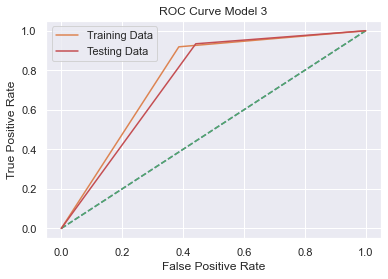

In [494]:

# calculate AUC
train_auc = metrics.roc_auc_score(Train['Transport'],model_sklearn_3_pred_train)
print('AUC for Train dataset: %.3f' % train_auc)

# # calculate roc curve

from sklearn.metrics import roc_curve
train_fpr, train_tpr, train_thresholds = roc_curve(Train['Transport'],model_sklearn_3_pred_train)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data')


# calculate AUC
test_auc = metrics.roc_auc_score(Test['Transport'],model_sklearn_3_pred_test)
print('AUC for test dataset: %.3f' % test_auc)

# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(Test['Transport'],model_sklearn_3_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve Model 3')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


### Observation AUC for Model 3:

AUC for Train dataset: 0.766


AUC for test dataset: 0.746

### Classification_report Model 3

In [495]:
# Train 
print('Train Classification_report Model 3')
print('\n')
print(metrics.classification_report(Train['Transport'],model_sklearn_3_pred_train,digits=3))

Train Classification_report Model 3


              precision    recall  f1-score   support

           0      0.785     0.614     0.689       101
           1      0.831     0.919     0.873       209

    accuracy                          0.819       310
   macro avg      0.808     0.766     0.781       310
weighted avg      0.816     0.819     0.813       310



In [496]:
# Test
print('Test Classification_report Model 3')
print('\n')
print(metrics.classification_report(Test['Transport'],model_sklearn_3_pred_test,digits=3))

Test Classification_report Model 3


              precision    recall  f1-score   support

           0      0.800     0.558     0.658        43
           1      0.817     0.934     0.872        91

    accuracy                          0.813       134
   macro avg      0.809     0.746     0.765       134
weighted avg      0.812     0.813     0.803       134



**Observation :**

With accuracy of 81.3% and recall rate of 93.4%, model is able to predict 91% of Public Transport which were actually claimed as claimed.

Precision is 81.7% of data which means, out of total employees predicted by model as opt for Public Transport , 81.7% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 93.4% plus Precisin rate is also 81.7% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

### AUC and ROC for the Training and Testing data Model 4

AUC for Train dataset: 0.771
AUC for test dataset: 0.752


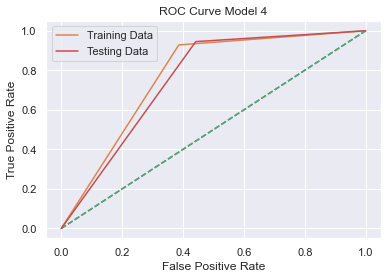

In [497]:

# calculate AUC
train_auc = metrics.roc_auc_score(Train['Transport'],model_sklearn_4_pred_train)
print('AUC for Train dataset: %.3f' % train_auc)

# # calculate roc curve

from sklearn.metrics import roc_curve
train_fpr, train_tpr, train_thresholds = roc_curve(Train['Transport'],model_sklearn_4_pred_train)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data')


# calculate AUC
test_auc = metrics.roc_auc_score(Test['Transport'],model_sklearn_4_pred_test)
print('AUC for test dataset: %.3f' % test_auc)

# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(Test['Transport'],model_sklearn_4_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve Model 4')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


### Observation AUC for Model 4:

AUC for Train dataset: 0.771


AUC for test dataset: 0.752

### Classification_report Model 4

In [498]:
# Train 
print('Train Classification_report Model 4')
print('\n')
print(metrics.classification_report(Train['Transport'],model_sklearn_4_pred_train,digits=3))

Train Classification_report Model 4


              precision    recall  f1-score   support

           0      0.805     0.614     0.697       101
           1      0.833     0.928     0.878       209

    accuracy                          0.826       310
   macro avg      0.819     0.771     0.787       310
weighted avg      0.824     0.826     0.819       310



In [499]:
# Test
print('Test Classification_report Model 4')
print('\n')
print(metrics.classification_report(Test['Transport'],model_sklearn_4_pred_test,digits=3))

Test Classification_report Model 4


              precision    recall  f1-score   support

           0      0.828     0.558     0.667        43
           1      0.819     0.945     0.878        91

    accuracy                          0.821       134
   macro avg      0.823     0.752     0.772       134
weighted avg      0.822     0.821     0.810       134



**Observation :**

With accuracy of 82.1% and recall rate of 94.5%, model is able to predict 94.5% of Public Transport which were actually claimed as claimed.

Precision is 81.9% of data which means, out of total employees predicted by model as opt for Public Transport , 81.9% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 94.5% plus Precisin rate is also 81.9% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

# 5. Apply KNN Model. Interpret the results.

### Building of KNN Model

In [500]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [501]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [502]:
### Scaling of Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [503]:
## Knn Model 

KNN_model=KNeighborsClassifier() # Default parameters of KNN 

In [504]:
# Fitting the KNN Model

KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

### Performance Matrix

In [505]:
# Performance Matrix on the train data

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8451612903225807

Confusion matrix Train : 
[[ 66  36]
 [ 12 196]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.85      0.65      0.73       102
           1       0.84      0.94      0.89       208

    accuracy                           0.85       310
   macro avg       0.85      0.79      0.81       310
weighted avg       0.85      0.85      0.84       310



Accuracy Score 0.8452
F1 Score 0.8909 

True Negative: 66 
False Positives: 36 
False Negatives: 12 
True Positives: 196 

Confusion Matrix Train :



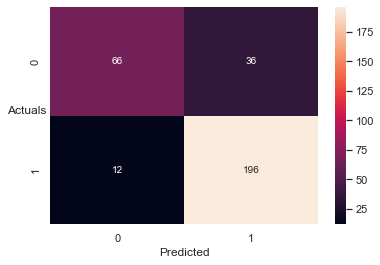

<Figure size 432x288 with 0 Axes>

In [506]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [507]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.7835820895522388

Confusion matrix Test : 
[[24 18]
 [11 81]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.69      0.57      0.62        42
           1       0.82      0.88      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



Accuracy Score 0.7836
F1 Score 0.8482 

True Negative: 24 
False Positives: 18 
False Negatives: 11 
True Positives: 81 

Confusion Matrix Test :



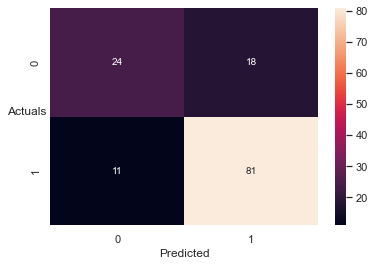

<Figure size 432x288 with 0 Axes>

In [508]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


**Observation :**

With accuracy of 78% and recall rate of 88%, model is able to predict 88% of Public Transport which were actually claimed as claimed.

Precision is 82% of data which means, out of total employees predicted by model as opt for Public Transport , 82% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 88% plus Precisin rate is also 82% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

In [509]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.921
AUC for the Test Data: 0.761


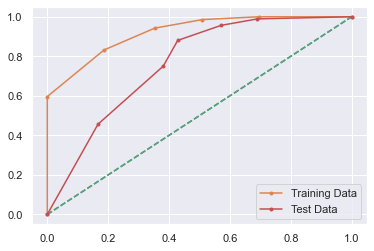

In [510]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Finding the Optimum K-Value

In [511]:
ac_scores_train = []

ac_scores_test = []


for k in range(1,30,2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)

  # Evaluate train accuracy
  score1 = knn.score(X_train,y_train)
  ac_scores_train.append(score1)

  # Evaluate test accuracy
  score2 = knn.score(X_test,y_test)
  ac_scores_test.append(score2)

In [512]:
print(ac_scores_train)
print(ac_scores_test)

[1.0, 0.8709677419354839, 0.8451612903225807, 0.8387096774193549, 0.832258064516129, 0.8354838709677419, 0.8225806451612904, 0.8290322580645161, 0.8193548387096774, 0.8225806451612904, 0.8129032258064516, 0.8, 0.8064516129032258, 0.7935483870967742, 0.7870967741935484]
[0.746268656716418, 0.7611940298507462, 0.7835820895522388, 0.7611940298507462, 0.7761194029850746, 0.7910447761194029, 0.7910447761194029, 0.8059701492537313, 0.8059701492537313, 0.7985074626865671, 0.8059701492537313, 0.8134328358208955, 0.8059701492537313, 0.8059701492537313, 0.7985074626865671]


### Graphical Presentation of K Values

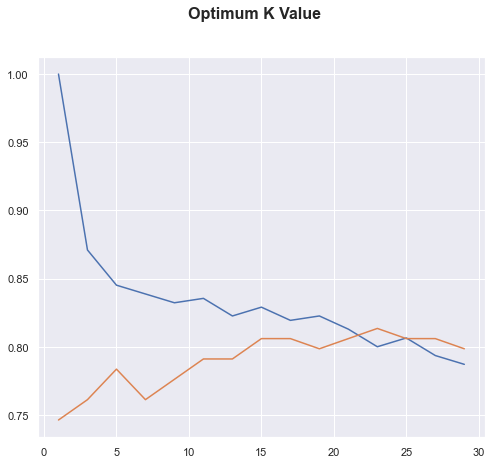

In [513]:
plt.figure(figsize = (8,7))

plt.plot(range(1,30,2) , ac_scores_train)
plt.plot(range(1,30,2) , ac_scores_test)

plt.suptitle('Optimum K Value',fontsize= 16, fontweight='bold')
plt.show()

### Observation:

* Form the above Graph we can clearly see that **Optimum K value lie in the range between 19-22**

#### Assume K = 20

In [514]:
KNN_model=KNeighborsClassifier(n_neighbors=20)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [515]:
# Performance Matrix on the train data

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8258064516129032

Confusion matrix Train : 
[[ 56  46]
 [  8 200]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.88      0.55      0.67       102
           1       0.81      0.96      0.88       208

    accuracy                           0.83       310
   macro avg       0.84      0.76      0.78       310
weighted avg       0.83      0.83      0.81       310



Accuracy Score 0.8258
F1 Score 0.8811 

True Negative: 56 
False Positives: 46 
False Negatives: 8 
True Positives: 200 

Confusion Matrix Train :



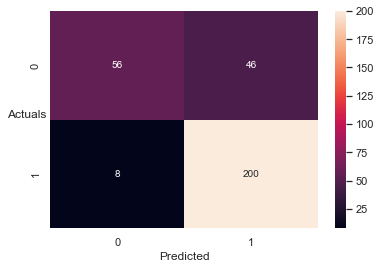

<Figure size 432x288 with 0 Axes>

In [516]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [1]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

NameError: name 'KNN_model' is not defined

Accuracy Score 0.7985
F1 Score 0.8657 

True Negative: 20 
False Positives: 22 
False Negatives: 5 
True Positives: 87 

Confusion Matrix Test :



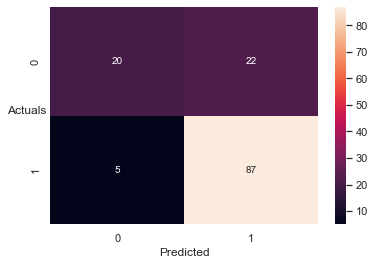

<Figure size 432x288 with 0 Axes>

In [518]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


**Observation :**

When we took **K-value = 20**

Then with accuracy of 80% and recall rate of 95%, model is able to predict 95% of Public Transport which were actually claimed as claimed.

Precision is 80% of data which means, out of total employees predicted by model as opt for Public Transport , 80% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 95% plus Precisin rate is also 80% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

In [519]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.879
AUC for the Test Data: 0.753


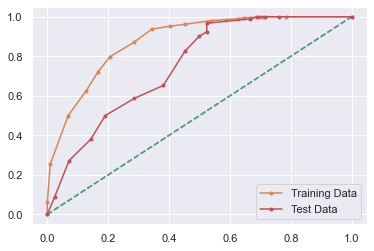

In [520]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [521]:
KNN_K20=(pd.DataFrame({'Train Accuracy': 83 ,'Test Accuracy': 80,
                                 'Train AUC':87,'Test AUC': 75,
                                 'Train Recall':96,'Test Recall': 95,
                                 'Train precision':81,'Test precision': 80,
                                 'Train f1':88,'Test f1': 87},
            index=['KNN K=20']))
print('\nClassification Report Train and Test Summary : ')
KNN_K20


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
KNN K=20,83,80,87,75,96,95,81,80,88,87


### Hyperprameter on KNN Model

In [522]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

In [523]:
param_grid = {
    'n_neighbors' : range(15,25),
    'p' : [1,2,3]
}

In [524]:
from sklearn.model_selection import GridSearchCV

In [525]:
grid_knn = GridSearchCV(KNeighborsClassifier() , param_grid=param_grid , refit = True , verbose = 3,cv = 5)

In [526]:
grid_knn.fit(X_train,y_train) # Training dataset

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...............n_neighbors=15, p=1;, score=0.823 total time=   0.0s
[CV 2/5] END ...............n_neighbors=15, p=1;, score=0.871 total time=   0.0s
[CV 3/5] END ...............n_neighbors=15, p=1;, score=0.774 total time=   0.0s
[CV 4/5] END ...............n_neighbors=15, p=1;, score=0.774 total time=   0.0s
[CV 5/5] END ...............n_neighbors=15, p=1;, score=0.839 total time=   0.0s
[CV 1/5] END ...............n_neighbors=15, p=2;, score=0.806 total time=   0.0s
[CV 2/5] END ...............n_neighbors=15, p=2;, score=0.839 total time=   0.0s
[CV 3/5] END ...............n_neighbors=15, p=2;, score=0.758 total time=   0.0s
[CV 4/5] END ...............n_neighbors=15, p=2;, score=0.758 total time=   0.0s
[CV 5/5] END ...............n_neighbors=15, p=2;, score=0.823 total time=   0.0s
[CV 1/5] END ...............n_neighbors=15, p=3;, score=0.823 total time=   0.1s
[CV 2/5] END ...............n_neighbors=15, p=3

[CV 2/5] END ...............n_neighbors=21, p=3;, score=0.823 total time=   0.0s
[CV 3/5] END ...............n_neighbors=21, p=3;, score=0.742 total time=   0.0s
[CV 4/5] END ...............n_neighbors=21, p=3;, score=0.726 total time=   0.0s
[CV 5/5] END ...............n_neighbors=21, p=3;, score=0.790 total time=   0.0s
[CV 1/5] END ...............n_neighbors=22, p=1;, score=0.839 total time=   0.0s
[CV 2/5] END ...............n_neighbors=22, p=1;, score=0.871 total time=   0.0s
[CV 3/5] END ...............n_neighbors=22, p=1;, score=0.726 total time=   0.0s
[CV 4/5] END ...............n_neighbors=22, p=1;, score=0.774 total time=   0.0s
[CV 5/5] END ...............n_neighbors=22, p=1;, score=0.806 total time=   0.0s
[CV 1/5] END ...............n_neighbors=22, p=2;, score=0.839 total time=   0.0s
[CV 2/5] END ...............n_neighbors=22, p=2;, score=0.823 total time=   0.0s
[CV 3/5] END ...............n_neighbors=22, p=2;, score=0.742 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(15, 25), 'p': [1, 2, 3]},
             verbose=3)

In [527]:
grid_knn.best_params_ #train dataset

{'n_neighbors': 15, 'p': 1}

In [528]:
KNN_model=KNeighborsClassifier(n_neighbors=15,p = 1)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [529]:
# Performance Matrix on the train data

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8483870967741935

Confusion matrix Train : 
[[ 62  40]
 [  7 201]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       102
           1       0.83      0.97      0.90       208

    accuracy                           0.85       310
   macro avg       0.87      0.79      0.81       310
weighted avg       0.86      0.85      0.84       310



Accuracy Score 0.8484
F1 Score 0.8953 

True Negative: 62 
False Positives: 40 
False Negatives: 7 
True Positives: 201 

Confusion Matrix Train :



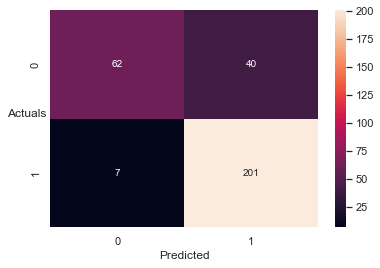

<Figure size 432x288 with 0 Axes>

In [530]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [531]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.7910447761194029

Confusion matrix Test : 
[[19 23]
 [ 5 87]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.79      0.45      0.58        42
           1       0.79      0.95      0.86        92

    accuracy                           0.79       134
   macro avg       0.79      0.70      0.72       134
weighted avg       0.79      0.79      0.77       134



Accuracy Score 0.791
F1 Score 0.8614 

True Negative: 19 
False Positives: 23 
False Negatives: 5 
True Positives: 87 

Confusion Matrix Test :



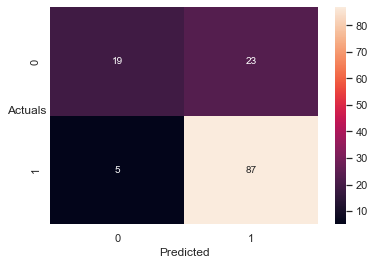

<Figure size 432x288 with 0 Axes>

In [532]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


**Observation :**

When we took **K-value = 15**

Then with accuracy of 79% and recall rate of 95%, model is able to predict 95% of Public Transport which were actually claimed as claimed.

Precision is 79% of data which means, out of total employees predicted by model as opt for Public Transport , 79% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 95% plus Precisin rate is also 79% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

In [533]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.898
AUC for the Test Data: 0.778


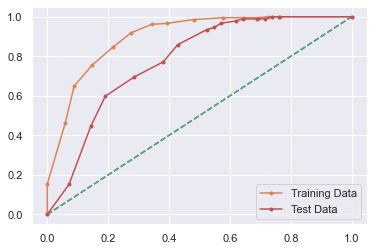

In [534]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [535]:
KNN_K25_tuned=(pd.DataFrame({'Train Accuracy': 85 ,'Test Accuracy': 79,
                                 'Train AUC':89,'Test AUC': 77,
                                 'Train Recall':97,'Test Recall': 95,
                                 'Train precision':83,'Test precision': 79,
                                 'Train f1':90,'Test f1': 86},
            index=['KNN K=15 Tuned']))
print('\nClassification Report Train and Test Summary : ')
KNN_K25_tuned


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
KNN K=15 Tuned,85,79,89,77,97,95,83,79,90,86


### KNN Summary Report: 

In [536]:
KNN = [KNN_K20,KNN_K25_tuned]
KNNresult = pd.concat(KNN)
KNNresult

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
KNN K=20,83,80,87,75,96,95,81,80,88,87
KNN K=15 Tuned,85,79,89,77,97,95,83,79,90,86


**Observation**

We can clearly see that even after Hyperprameter tunning of KNN Model(K=15) their is a decrease in the model preformance.


Thus K=20 gives the best output for KNN Model.

# 6. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

In [537]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [538]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Bagging Classifier (Random Forest)

In [539]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [540]:
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [541]:
# Performance Matrix on the train data

y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.967741935483871

Confusion matrix Train : 
[[ 92  10]
 [  0 208]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       102
           1       0.95      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.98      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



Accuracy Score 0.9677
F1 Score 0.9765 

True Negative: 92 
False Positives: 10 
False Negatives: 0 
True Positives: 208 

Confusion Matrix Train :



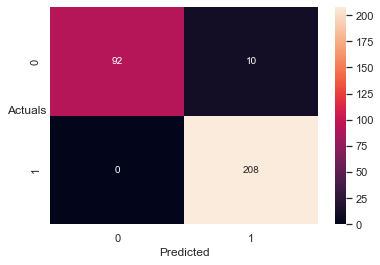

<Figure size 432x288 with 0 Axes>

In [542]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [543]:
## Performance Matrix on test data set

y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8059701492537313

Confusion matrix Test : 
[[24 18]
 [ 8 84]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        42
           1       0.82      0.91      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.74      0.76       134
weighted avg       0.80      0.81      0.80       134



Accuracy Score 0.806
F1 Score 0.866 

True Negative: 24 
False Positives: 18 
False Negatives: 8 
True Positives: 84 

Confusion Matrix Test :



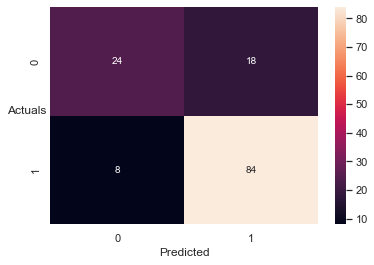

<Figure size 432x288 with 0 Axes>

In [544]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [545]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.833


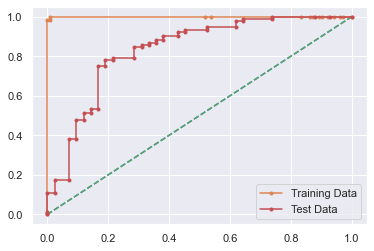

In [546]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [547]:
Bagging_model=(pd.DataFrame({'Train Accuracy': 97 ,'Test Accuracy': 81,'Train AUC':100,'Test AUC': 83.3,'Train Recall':100,'Test Recall': 91,'Train precision':95,'Test precision': 82,'Train f1':98,'Test f1': 87},
            index=['Bagging ']))
print('\nClassification Report Train and Test Summary : ')
Bagging_model 


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Bagging,97,81,100,83.3,100,91,95,82,98,87


**Observation** 

* The overall accuracy (train 97% and test 81%) seems to be decent using bagging but , there is a huge difference between test/train accuracy value.

* Similarly Model Recall score shows 100% in train and 91% Test which is decent.

* Precision also have huge differnce which means the model is not able to preciely tell who all the employee opting for 1(Public Transport)

Therfore there seems to be Overfitting which can be rectified by Hyperparameter tuning of the RandomForestClassifier.

## Hyperparameter tuning  of Bagging Classifier (Random Forest)

In [548]:
from sklearn.model_selection import GridSearchCV

cart = RandomForestClassifier()


cart_params = [{'max_depth': list(range(10, 15)), 
                  
                'min_samples_split': list(range(0,5)),
                
                'min_samples_leaf': list(range(0,5)),
               'criterion': ['gini','entropy']}
                 ]
clf = GridSearchCV(cart, cart_params, cv = 5, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14],
                          'min_samples_leaf': [0, 1, 2, 3, 4],
                          'min_samples_split': [0, 1, 2, 3, 4]}],
             scoring='accuracy')

In [549]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [550]:
cart = RandomForestClassifier(criterion = 'gini', max_depth= 14, min_samples_leaf= 2, min_samples_split= 4)

In [551]:
Bagging_model_hyp=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)

Bagging_model_hyp.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=14,
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=100, random_state=1)

In [552]:
# Performance Matrix on the train data

y_train_predict = Bagging_model_hyp.predict(X_train)
model_score = Bagging_model_hyp.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.896774193548387

Confusion matrix Train : 
[[ 74  28]
 [  4 204]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       102
           1       0.88      0.98      0.93       208

    accuracy                           0.90       310
   macro avg       0.91      0.85      0.87       310
weighted avg       0.90      0.90      0.89       310



Accuracy Score 0.8968
F1 Score 0.9273 

True Negative: 74 
False Positives: 28 
False Negatives: 4 
True Positives: 204 

Confusion Matrix Train :



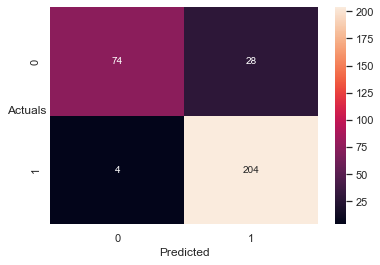

<Figure size 432x288 with 0 Axes>

In [553]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [554]:
## Performance Matrix on test data set

y_test_predict = Bagging_model_hyp.predict(X_test)
model_score = Bagging_model_hyp.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8059701492537313

Confusion matrix Test : 
[[23 19]
 [ 7 85]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.77      0.55      0.64        42
           1       0.82      0.92      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.74      0.75       134
weighted avg       0.80      0.81      0.80       134



Accuracy Score 0.806
F1 Score 0.8673 

True Negative: 23 
False Positives: 19 
False Negatives: 7 
True Positives: 85 

Confusion Matrix Test :



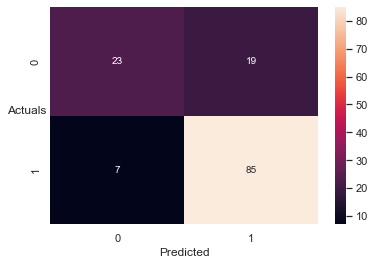

<Figure size 432x288 with 0 Axes>

In [555]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [556]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model_hyp.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model_hyp.predict_proba(X_test)

AUC for the Training Data: 0.983
AUC for the Test Data: 0.827


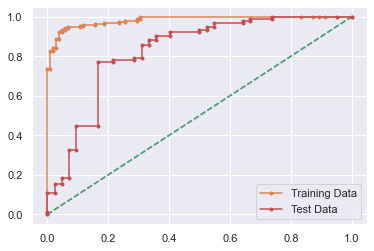

In [557]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [558]:
Bagging_model_hyp=(pd.DataFrame({'Train Accuracy': 90 ,'Test Accuracy': 81,'Train AUC':98.3,'Test AUC': 82.7,'Train Recall':98,'Test Recall': 92,'Train precision':88,'Test precision': 82,'Train f1':93,'Test f1': 87},
            index=['Bagging Tuned ']))
print('\nClassification Report Train and Test Summary : ')
Bagging_model_hyp 


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Bagging Tuned,90,81,98.3,82.7,98,92,88,82,93,87


### Bagging Summary Report:

In [559]:
BG = [Bagging_model,Bagging_model_hyp ]
BGresult = pd.concat(BG)
BGresult

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Bagging,97,81,100.0,83.3,100,91,95,82,98,87
Bagging Tuned,90,81,98.3,82.7,98,92,88,82,93,87


**Observation:** 

Here we can clearly interpret an improvement in the model.

* Accuracy score seems decent(train 90% and test 81%) not much improvement.

* There seems to be a good improvement in Recall score(train 98% and test 92%) which means model is able to properly recall the no. of employees opting for 1(Public Transport).

* Also a very a good improvement in the Precision rate(train 88% and test 82%) which means model is able to preciely tell who are the employee that are opting for 1(Public Transport)

* A good improvement in the AUC also.

### Boosting 

In [560]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [561]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Gradient Boosting

In [562]:
from sklearn.ensemble import GradientBoostingClassifier

In [563]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [564]:
gbcl.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [565]:
# Performance Matrix on the train data

y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.964516129032258

Confusion matrix Train : 
[[ 93   9]
 [  2 206]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       102
           1       0.96      0.99      0.97       208

    accuracy                           0.96       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.96      0.96      0.96       310



Accuracy Score 0.9645
F1 Score 0.974 

True Negative: 93 
False Positives: 9 
False Negatives: 2 
True Positives: 206 

Confusion Matrix Train :



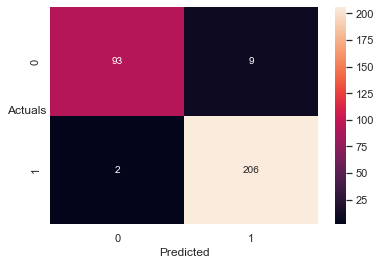

<Figure size 432x288 with 0 Axes>

In [566]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [567]:
## Performance Matrix on test data set

y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.7835820895522388

Confusion matrix Test : 
[[25 17]
 [12 80]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.68      0.60      0.63        42
           1       0.82      0.87      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



Accuracy Score 0.7836
F1 Score 0.8466 

True Negative: 25 
False Positives: 17 
False Negatives: 12 
True Positives: 80 

Confusion Matrix Test :



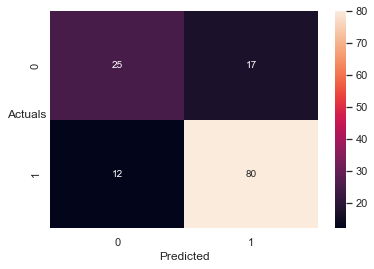

<Figure size 432x288 with 0 Axes>

In [568]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [569]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.998
AUC for the Test Data: 0.805


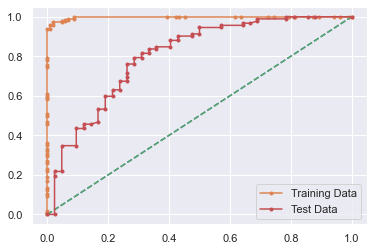

In [570]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [571]:
Gradient_Boosting=(pd.DataFrame({'Train Accuracy': 96 ,'Test Accuracy': 78,
                                 'Train AUC':99,'Test AUC': 80,
                                 'Train Recall':99,'Test Recall': 87,
                                 'Train precision':96,'Test precision': 82,
                                 'Train f1':97,'Test f1': 85},
            index=['Gradient Boosting ']))
print('\nClassification Report Train and Test Summary : ')
Gradient_Boosting 


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Gradient Boosting,96,78,99,80,99,87,96,82,97,85


**Observation :**

* Their seems to be clear case of Overfitting of model.

* Huge difference between train and test for Accuracy,Recall,Precision, and F1 score

* Gradient Boosting model is not properly grasp the data need to do proper Hyperprameter Tuning.

### Hyperparameter tuning  of Gradient Boosting

In [572]:
from sklearn.model_selection import GridSearchCV

gbcl = GradientBoostingClassifier(random_state=1)



gbcl_params = [{'max_depth': [5,7], 
                  
                'min_samples_split': [50,100],
                
                'min_samples_leaf': [20,50],
               }
                 ]
clf = GridSearchCV(gbcl, gbcl_params, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid=[{'max_depth': [5, 7], 'min_samples_leaf': [20, 50],
                          'min_samples_split': [50, 100]}],
             scoring='accuracy')

In [573]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [574]:
gbcl = GradientBoostingClassifier(max_depth = 5, min_samples_leaf = 50, min_samples_split= 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [575]:
# Performance Matrix on the train data

y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8709677419354839

Confusion matrix Train : 
[[ 72  30]
 [ 10 198]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.87      0.95      0.91       208

    accuracy                           0.87       310
   macro avg       0.87      0.83      0.85       310
weighted avg       0.87      0.87      0.87       310



Accuracy Score 0.871
F1 Score 0.9083 

True Negative: 72 
False Positives: 30 
False Negatives: 10 
True Positives: 198 

Confusion Matrix Train :



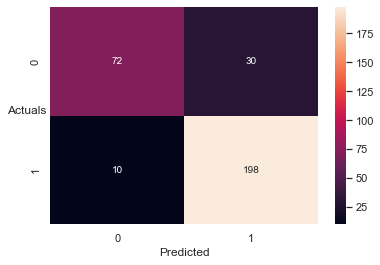

<Figure size 432x288 with 0 Axes>

In [576]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [577]:
## Performance Matrix on test data set

y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8507462686567164

Confusion matrix Test : 
[[27 15]
 [ 5 87]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.85      0.95      0.90        92

    accuracy                           0.85       134
   macro avg       0.85      0.79      0.81       134
weighted avg       0.85      0.85      0.84       134



Accuracy Score 0.8507
F1 Score 0.8969 

True Negative: 27 
False Positives: 15 
False Negatives: 5 
True Positives: 87 

Confusion Matrix Test :



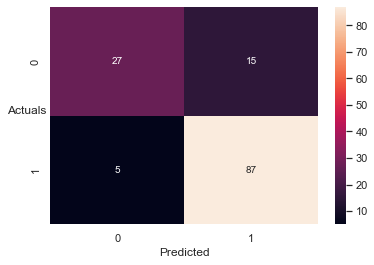

<Figure size 432x288 with 0 Axes>

In [578]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [579]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.946
AUC for the Test Data: 0.833


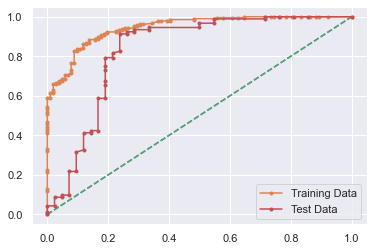

In [580]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [581]:
Gradient_Boosting_tuned=(pd.DataFrame({'Train Accuracy': 87 ,'Test Accuracy': 85,
                                 'Train AUC':94,'Test AUC': 83,
                                 'Train Recall':95,'Test Recall': 95,
                                 'Train precision':97,'Test precision': 85,
                                 'Train f1':91,'Test f1': 90},
            index=['Gradient Boosting Tuned']))
print('\nClassification Report Train and Test Summary : ')
Gradient_Boosting_tuned


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Gradient Boosting Tuned,87,85,94,83,95,95,97,85,91,90


### Gradient Boosting Summary Report:

In [582]:
GB = [Gradient_Boosting,Gradient_Boosting_tuned]
GBresult = pd.concat(GB)
GBresult

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Gradient Boosting,96,78,99,80,99,87,96,82,97,85
Gradient Boosting Tuned,87,85,94,83,95,95,97,85,91,90


**Observation**

* Their is an over all improvement in the model

* Recall seems to be prefect for both train and test

* Accuracy score also improved 

* Precision and Recall also improved

### AdaBoost

In [583]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [584]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [585]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [586]:
# Performance Matrix on the train data

y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.864516129032258

Confusion matrix Train : 
[[ 72  30]
 [ 12 196]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.86      0.71      0.77       102
           1       0.87      0.94      0.90       208

    accuracy                           0.86       310
   macro avg       0.86      0.82      0.84       310
weighted avg       0.86      0.86      0.86       310



Accuracy Score 0.8645
F1 Score 0.9032 

True Negative: 72 
False Positives: 30 
False Negatives: 12 
True Positives: 196 

Confusion Matrix Train :



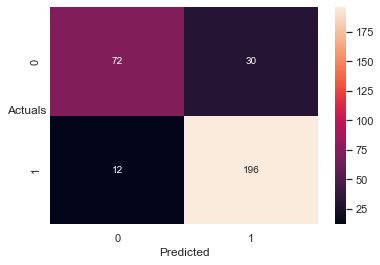

<Figure size 432x288 with 0 Axes>

In [587]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [588]:
## Performance Matrix on test data set

y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8059701492537313

Confusion matrix Test : 
[[28 14]
 [12 80]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        42
           1       0.85      0.87      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.80      0.81      0.80       134



Accuracy Score 0.806
F1 Score 0.8602 

True Negative: 28 
False Positives: 14 
False Negatives: 12 
True Positives: 80 

Confusion Matrix Test :



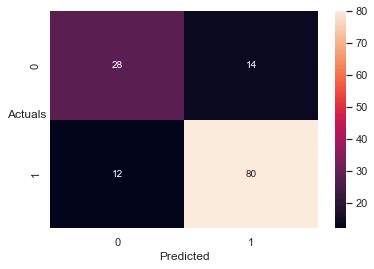

<Figure size 432x288 with 0 Axes>

In [589]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [590]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.938
AUC for the Test Data: 0.791


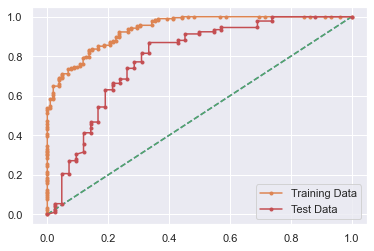

In [591]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [592]:
ada_Boosting=(pd.DataFrame({'Train Accuracy': 86 ,'Test Accuracy': 81,
                                 'Train AUC':93,'Test AUC': 79,
                                 'Train Recall':94,'Test Recall': 87,
                                 'Train precision':87,'Test precision': 85,
                                 'Train f1':90,'Test f1': 86},
            index=['ADA Boosting ']))
print('\nClassification Report Train and Test Summary : ')
ada_Boosting 


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
ADA Boosting,86,81,93,79,94,87,87,85,90,86


**Observation :**

* Their seems to be a case of Overfitting of model.

* Huge difference between train and test for Recall and F1 score

* Accuracy and Precision seems decent

Lets do some hyperprameter tuning to see if their is any improvement

In [593]:
ADB_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

### Hyperparameter tuning  of ADA Boosting

In [594]:
from sklearn.model_selection import GridSearchCV

ADB_model = AdaBoostClassifier(random_state=1)



ADB_params = [{'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
                  
                'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
                
                'algorithm': ['SAMME', 'SAMME.R']
               }
                 ]
clf = GridSearchCV(ADB_model, ADB_params, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                            1.03, 1.04],
                          'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           20]}],
             scoring='accuracy')

In [595]:
clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.97, 'n_estimators': 20}

In [596]:
ADB_model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.97, n_estimators = 20)
ADB_model = ADB_model.fit(X_train, y_train)

In [597]:
# Performance Matrix on the train data

y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8225806451612904

Confusion matrix Train : 
[[ 61  41]
 [ 14 194]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       102
           1       0.83      0.93      0.88       208

    accuracy                           0.82       310
   macro avg       0.82      0.77      0.78       310
weighted avg       0.82      0.82      0.81       310



Accuracy Score 0.8226
F1 Score 0.8758 

True Negative: 61 
False Positives: 41 
False Negatives: 14 
True Positives: 194 

Confusion Matrix Train :



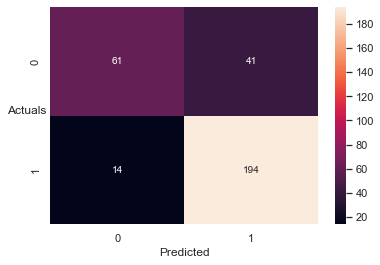

<Figure size 432x288 with 0 Axes>

In [598]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [599]:
## Performance Matrix on test data set

y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8208955223880597

Confusion matrix Test : 
[[26 16]
 [ 8 84]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        42
           1       0.84      0.91      0.87        92

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.82      0.82      0.82       134



Accuracy Score 0.8209
F1 Score 0.875 

True Negative: 26 
False Positives: 16 
False Negatives: 8 
True Positives: 84 

Confusion Matrix Test :



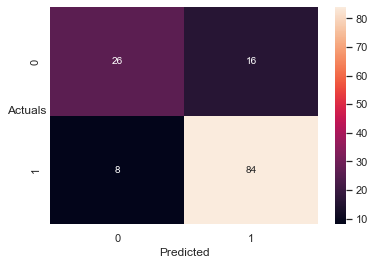

<Figure size 432x288 with 0 Axes>

In [600]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


In [601]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.887
AUC for the Test Data: 0.793


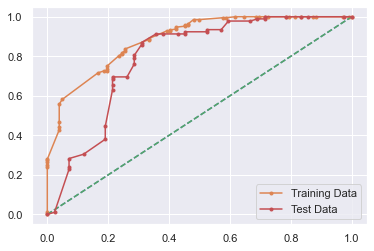

In [602]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [603]:
ada_Boosting_tuned=(pd.DataFrame({'Train Accuracy': 82 ,'Test Accuracy': 82,
                                 'Train AUC':88,'Test AUC': 79,
                                 'Train Recall':93,'Test Recall': 91,
                                 'Train precision':83,'Test precision': 84,
                                 'Train f1':88,'Test f1': 87},
            index=['ADA Boosting Tuned ']))
print('\nClassification Report Train and Test Summary : ')
ada_Boosting_tuned


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
ADA Boosting Tuned,82,82,88,79,93,91,83,84,88,87


### ADABoost Summary Report:

In [604]:
ADA = [ada_Boosting,ada_Boosting_tuned]
ADAresult = pd.concat(ADA)
ADAresult

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
ADA Boosting,86,81,93,79,94,87,87,85,90,86
ADA Boosting Tuned,82,82,88,79,93,91,83,84,88,87


**Observation**

* Their is an over all improvement in the model

* Accuracy seems to be prefect for both train and test

* Recall score also improved 

* Precision and Recall also improved

### Models Summary Report:

In [605]:
models_summ = [BGresult,GBresult,ADAresult]
models_summ_result = pd.concat(models_summ)
models_summ_result

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Bagging,97,81,100.0,83.3,100,91,95,82,98,87
Bagging Tuned,90,81,98.3,82.7,98,92,88,82,93,87
Gradient Boosting,96,78,99.0,80.0,99,87,96,82,97,85
Gradient Boosting Tuned,87,85,94.0,83.0,95,95,97,85,91,90
ADA Boosting,86,81,93.0,79.0,94,87,87,85,90,86
ADA Boosting Tuned,82,82,88.0,79.0,93,91,83,84,88,87


**Observation**

* ADA Boosting Model seems to be preforming better than Baggng and Gradient Boosting

In the Ada Boosting Tuned Model:

With accuracy of 82% and recall rate of 91%, model is able to predict 91% of Public Transport which were actually claimed as claimed.

Precision is 84% of data which means, out of total employees predicted by model as opt for Public Transport , 84% employees actually opted for the Public Transport.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 91% plus Precisin rate is also 84% for opting Public transport thus this does looks good enough for classification**

# 7. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 

In [606]:
X = df1.drop('Transport',axis = 1)

y = df1['Transport']

In [607]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

### Creating user define function so to run model multiple times for different grid search parameters


In [608]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [609]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

### Logistic Regression model

In [610]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [611]:
# Predicting on Training and Test dataset

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [612]:
# Getting the Predicted Classes and Probs

ytest_predict_prob=model.predict_proba(X_test)

In [613]:
# Model Evaluation Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.8193548387096774
Model score for training dataset 0.7985074626865671


#### Probability of AUC and ROC for the training data & test data

AUC for Train dataset: 0.842
AUC for test dataset: 0.842


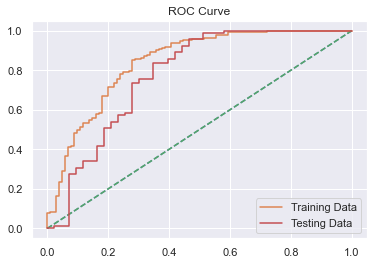

In [614]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Confusion Matrix for the training data and testing data

In [615]:
confusion_matrix(y_train, ytrain_predict)

array([[ 63,  38],
       [ 18, 191]], dtype=int64)

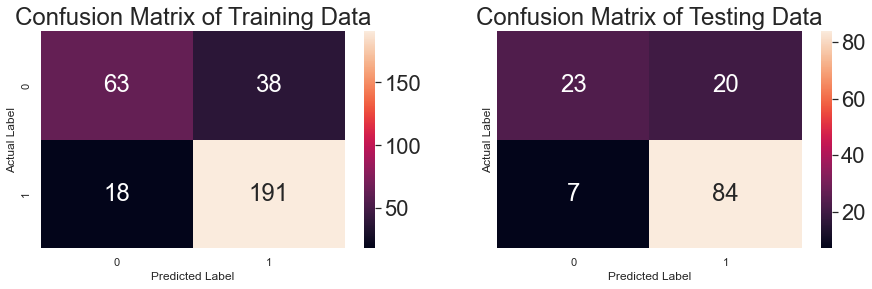

In [616]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [617]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.78      0.62      0.69       101
           1       0.83      0.91      0.87       209

    accuracy                           0.82       310
   macro avg       0.81      0.77      0.78       310
weighted avg       0.82      0.82      0.81       310
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.81      0.92      0.86        91

    accuracy                           0.80       134
   macro avg       0.79      0.73      0.75       134
weighted avg       0.79      0.80      0.79       134
 



In [618]:
log_reg=(pd.DataFrame({'Train Accuracy': 82 ,'Test Accuracy': 80,
                                 'Train AUC':84,'Test AUC': 84,
                                 'Train Recall':91,'Test Recall': 92,
                                 'Train precision':83,'Test precision': 81,
                                 'Train f1':87,'Test f1': 86},
            index=['Logistic Regression']))
print('\nClassification Report Train and Test Summary : ')
log_reg


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Logistic Regression,82,80,84,84,91,92,83,81,87,86


**Obervation**

Logistic regression Model seems good with Good Accuracy, Recall , Precision and F1 Scores

#### Applying GridSearchCV for Logistic Regression

In [619]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [620]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       101
           1       0.83      0.91      0.87       209

    accuracy                           0.82       310
   macro avg       0.81      0.77      0.78       310
weighted avg       0.82      0.82      0.81       310


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.81      0.92      0.86        91

    accuracy                           0.80       134
   macro avg       0.79      0.73      0.75       134
weighted avg       0.79      0.80      0.79       134



In [621]:
log_reg_model = LogisticRegression(penalty = 'none', solver = 'lbfgs', tol = 0.0001)
log_reg_model = log_reg_model.fit(X_train, y_train)

In [622]:
# Training Data Probability Prediction
pred_prob_train = log_reg_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = log_reg_model.predict_proba(X_test)

AUC for the Training Data: 0.842
AUC for the Test Data: 0.776


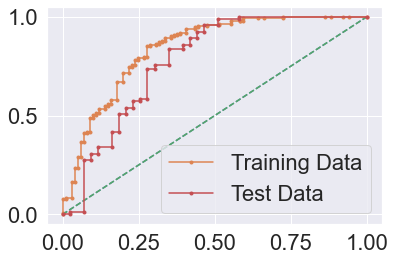

In [623]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [624]:
log_reg_tuned=(pd.DataFrame({'Train Accuracy': 82 ,'Test Accuracy': 80,
                                 'Train AUC':87,'Test AUC': 82,
                                 'Train Recall':91,'Test Recall': 92,
                                 'Train precision':83,'Test precision': 81,
                                 'Train f1':87,'Test f1': 86},
            index=['Logistic Regression Tuned']))
print('\nClassification Report Train and Test Summary : ')
log_reg_tuned


Classification Report Train and Test Summary : 


,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Logistic Regression Tuned,82,80,87,82,91,92,83,81,87,86


### Logistic Regresssion Summary:

In [625]:
log_r = [log_reg,log_reg_tuned]
log_r_result = pd.concat(log_r)
log_r_result

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Logistic Regression,82,80,84,84,91,92,83,81,87,86
Logistic Regression Tuned,82,80,87,82,91,92,83,81,87,86


**Observation**

* Even after Logistic regression model tuning results seems similar no change

* Logistic Regression Model seem good

## K-NN, BAGGING, GRADIENT BOOSTING AND ADA BOOSTING confusion matrix and other things are already done previous questions please check.

### Scaling

In [626]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

In [627]:
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [628]:
## Train and test dataframe have been scaled now
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

## Here we care now checking all the 5 models performance together with and without Tuning in order to find which model performed better

### Checking all the 5 Models without Tuning

In [629]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
KNN = KNeighborsClassifier()
Bagg = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,random_state=1)
gbcl = GradientBoostingClassifier(random_state=1)
ADA = AdaBoostClassifier(random_state=1)

In [630]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
    #print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
    precision = round(df_metrics.loc["1"][0],2)
    recall = round(df_metrics.loc["1"][1],2)
    f1 = round(df_metrics.loc["1"][2],2)
    return precision, recall, f1

In [631]:
models=[lgr,KNN,Bagg,gbcl,ADA]

modelnames = ['Logistic Regression','KNN','Bagging','Gradient Boost','Ada Boost']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

[LibLinear]

AUC for Logistic Regression is: 0.84
AUC for KNN is: 0.93
AUC for Bagging is: 1.0
AUC for Gradient Boost is: 1.0
AUC for Ada Boost is: 0.94


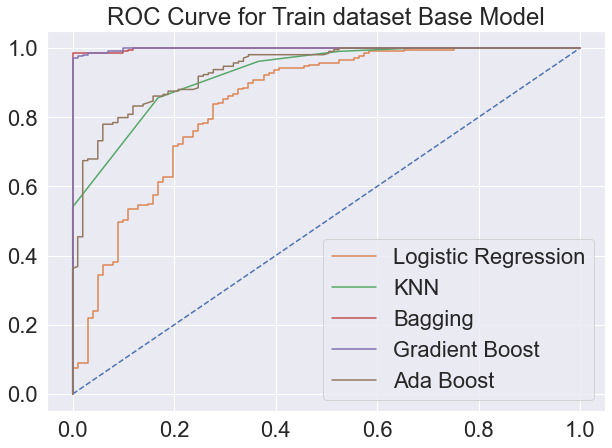

In [632]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Base Model')
plt.legend(loc='best')
plt.show()

AUC for Logistic Regression is: 0.77
AUC for KNN is: 0.84
AUC for Bagging is: 0.87
AUC for Gradient Boost is: 0.86
AUC for Ada Boost is: 0.83


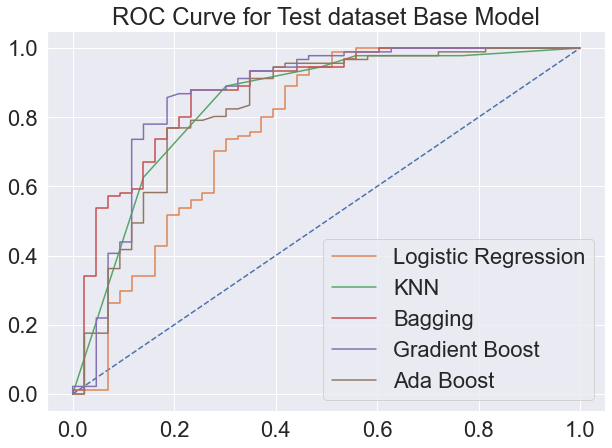

In [633]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Base Model')
plt.legend(loc='best')
plt.show()

### Summary Of Train and Test Accuracy on the 5 Models (Base Model)

In [634]:
models_preform=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','KNN','Bagging','Gradient Boost','Ada Boost']))        
models_preform.T   

,Logistic Regression,KNN,Bagging,Gradient Boost,Ada Boost
Train Accuracy,0.83,0.85,0.96,0.97,0.86
Test Accuracy,0.81,0.81,0.82,0.84,0.83
Train AUC,0.84,0.93,1.00,1.00,0.94
Test AUC,0.77,0.84,0.87,0.86,0.83
Train Recall,0.93,0.96,0.99,0.99,0.96
Test Recall,0.95,0.95,0.95,0.95,0.93
Train precision,0.83,0.84,0.95,0.96,0.86
Test precision,0.81,0.80,0.82,0.83,0.83
Train f1,0.88,0.90,0.97,0.98,0.90
Test f1,0.87,0.87,0.88,0.89,0.88


**Observation**

* Logistic Regression Model has show better performance out of all 5 models

Lets check what happens after Pruning of all the 5 models

### Putting pruned parameters to the 5 models

In [635]:
lgr = LogisticRegression(penalty = 'none', solver = 'lbfgs', tol = 0.0001,random_state=1)

KNN = KNeighborsClassifier(n_neighbors=20,p = 1)

Bagg = BaggingClassifier(base_estimator= RandomForestClassifier(criterion = 'gini', max_depth= 14, min_samples_leaf= 2, min_samples_split= 4),n_estimators=100,random_state=1)

gbcl = GradientBoostingClassifier(max_depth = 5, min_samples_leaf = 50, min_samples_split= 50,random_state=1)

ADA = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.97, n_estimators = 20)

In [636]:
models=[lgr,KNN,Bagg,gbcl,ADA]

modelnames = ['Logistic Regression','KNN','Bagging','Gradient Boost','Ada Boost']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

AUC for Logistic Regression is: 0.84
AUC for KNN is: 0.87
AUC for Bagging is: 0.98
AUC for Gradient Boost is: 0.94
AUC for Ada Boost is: 0.88


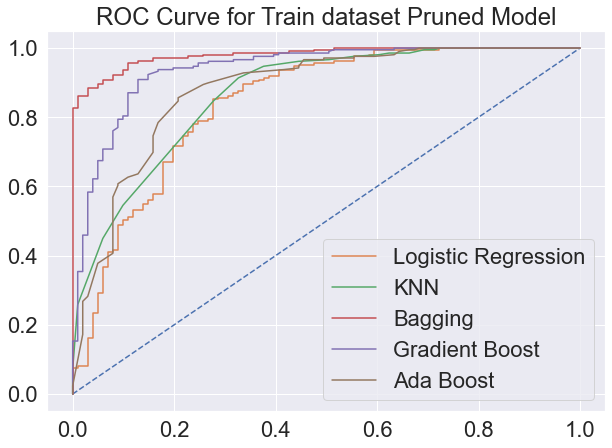

In [637]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Pruned Model')
plt.legend(loc='best')
plt.show()

AUC for Logistic Regression is: 0.78
AUC for KNN is: 0.84
AUC for Bagging is: 0.86
AUC for Gradient Boost is: 0.84
AUC for Ada Boost is: 0.82


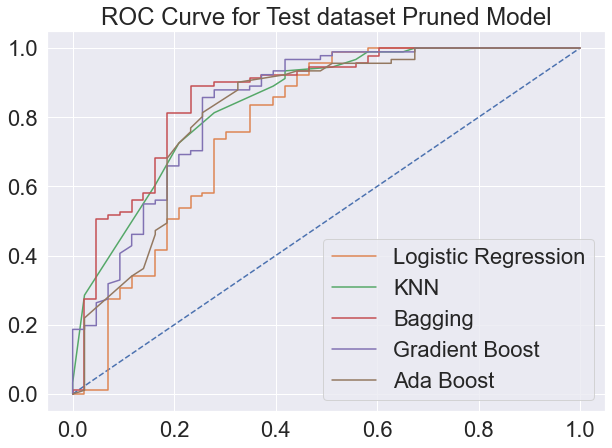

In [638]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Pruned Model')
plt.legend(loc='best')
plt.show()

### Summary Of Train and Test Accuracy on the 5 Models after Pruning

In [639]:
models_preform=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','KNN','Bagging','Gradient Boost','Ada Boost']))        
models_preform.T   

,Logistic Regression,KNN,Bagging,Gradient Boost,Ada Boost
Train Accuracy,0.82,0.81,0.90,0.89,0.82
Test Accuracy,0.80,0.80,0.79,0.84,0.81
Train AUC,0.84,0.87,0.98,0.94,0.88
Test AUC,0.78,0.84,0.86,0.84,0.82
Train Recall,0.91,0.97,0.98,0.96,0.95
Test Recall,0.92,0.97,0.95,0.97,0.96
Train precision,0.83,0.80,0.89,0.88,0.81
Test precision,0.81,0.79,0.79,0.83,0.80
Train f1,0.87,0.87,0.93,0.92,0.88
Test f1,0.86,0.87,0.86,0.89,0.87


**Observation**

* AdaBoost has preformed the best out of all 5 models after pruning i.e Logistic regression, KNN, Bagging, Gradient Boost, Ada Boost.

* AdaBoost is the most Balance model out of all % models.

* After Pruning Logistic Regression performance have gone down significantly which actually performed best before pruning.

Thus we can conclude that Ada Boost is the best model:

With accuracy of 81% and recall rate of 96%, model is able to predict 95% of Public Transport which were actually claimed as claimed.

Precision is 80% of data which means, out of total employees predicted by model as opt for Public Transport , 80% employees actually opted for the Public Transport.

F1-score(87%) is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 96% plus Precisin rate is also 80% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**

# Inference:

# 8. Based on these predictions, what are the insights? 


**Insights:**

1. The count of Employees in ABC Company using Public Transport(300) are more compared to Private Transport (144).

2. The Count plot clearly states that most of the Employee in ABC Company doesn't have license. More no. of Male's(94) have license compared to Female's(10).

3. Public Transport is the most preferred mode by the ABC Company Employees. Male(93) are more compared to Females(51) in Private Transport. Their is Imbalance of data between Public and Private Transport in Males (i.e 223:93). Thus our travel company can travel employees who use public transport.

4. There are some Employees who prefer to Public Transport even though they have license. We can assume that these employee live far from office.


5. As per Ada Boost model:

With accuracy of 81% and recall rate of 96%, model is able to predict 95% of Public Transport which were actually claimed as claimed.

Precision is 80% of data which means, out of total employees predicted by model as opt for Public Transport , 80% employees actually opted for the Public Transport.

F1-score(87%) is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for Public Transport  or Private Transport, for practical purposes, we will be more interested in correctly classifying 1 (Public Transport) than 0(Private Transport).

If a employee Private Transport is incorrectly predicted to be "Public Transport" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for Public Transport is incorrectly predicted to be Private Transport by the model, then the cost impact would be very high for the Transport company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very good around 96% plus Precisin rate is also 80% for opting Public transport thus this does looks good enough for classification**

**Thus our Trasport Company can target these Employee's for providing services.**




**Recommendations for Transport Company:**

1. We can target employee's who use Public Transport as most of employee's in ABC Company uses Public Transport to come to office.

2. Our Transport company can provide pick and drop from home to office and vice versa facilities which helps saves times for the employee's.

3. Employees safety and comfort can also be maintained which is less compared to Pulic Transport.

4. Our travel angecy can provide AC buses with proper hygiene maintaied. 

5. Timely pick and drop facilities for the employee's which will also help in their work life balance and also saves time which is usually very difficult in Public Transport.

6. Money spend on Public Transport can be saved by the employee's as they using our Travel Company facilities.


